In [2]:
# Read the data
df = pd.read_csv('Superstore.csv' , encoding='windows-1252')
pd.options.display.max_columns = None # to shaow all coulmn
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0        42420  South  FUR-BO-10001798        Furniture    Bookcases   
1        42420  South  FUR-CH-10000454        Furniture       Chairs   
2        90036   West  OFF-LA-10000240  Office Supplies       Labels   
3        33311  South  FUR-TA-10000577        Furniture       Tables   
4        33311  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [3]:
#How many columns and rows 
df.shape

(9994, 21)

In [4]:
# Details of data tyoes for each variable in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
# Check if there are any missing values in the data
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
# Check if there are any duplicated values in the data
df.duplicated().sum()

np.int64(0)

In [7]:
# Dropping  Row ID column and assigning to df
df=df.drop('Row ID',axis=1)


In [8]:
# Numerical Data Description
df.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

- Mean Sales: The average sales amount is $229.86

- Maximum Sales: The highest sales amount is $22,638.48 higher than the mean may be potential outliers

- Sales Distribution: The large standard deviation ($623.25) indicates high variability in sales

- No Discount: At least 25% of records (Q1 = 0) have no discount applied

- Losses: The minimum value indicates a loss of $-6,599.98 meaning some transactions resulted in significant losses

<Axes: xlabel='Profit'>

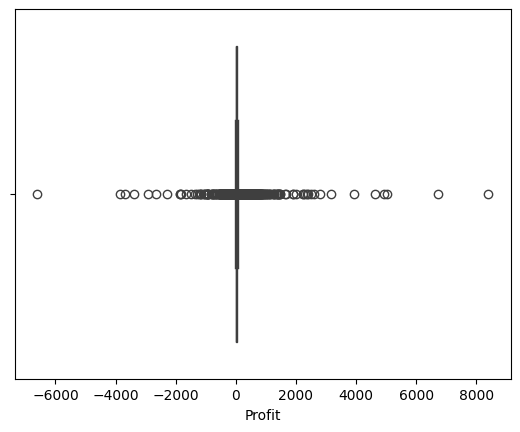

In [9]:
sns.boxplot(x='Profit', data=df)

<Axes: xlabel='Sales'>

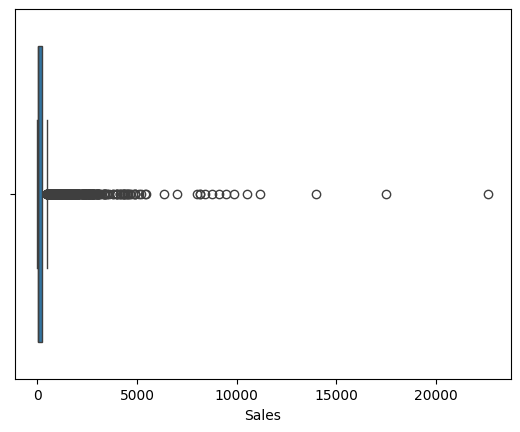

In [10]:
sns.boxplot(x='Sales', data=df)

- After checking the boxplots and the dataset, there is no significant outlier in variable Sales and Profit. 

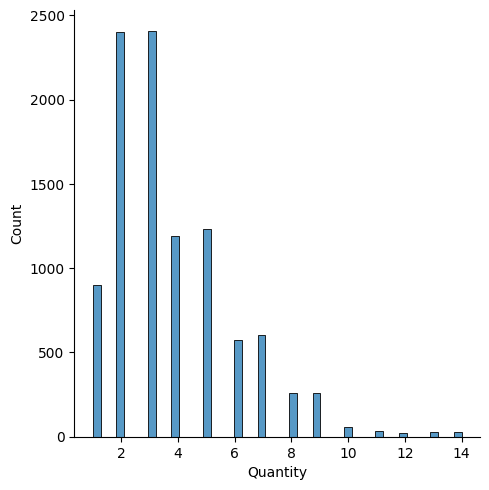

In [11]:
sns.displot(df['Quantity'], kde=False)

- The frequency distribution of Quantity is positively skewed. Most customers order 2-5 individual products and only a few customers order more than 8 individual products at a time.


In [12]:
# let's collect categorical data in dataframe
df_categ = df[[ 'Ship Mode', 'Customer ID', 'Customer Name',
             'Segment', 'Country', 'City', 'State', 'Region',
             'Product ID', 'Category', 'Sub-Category', 'Product Name']]
df_categ.head()

Ship Mode Customer ID    Customer Name    Segment        Country  \
0    Second Class    CG-12520      Claire Gute   Consumer  United States   
1    Second Class    CG-12520      Claire Gute   Consumer  United States   
2    Second Class    DV-13045  Darrin Van Huff  Corporate  United States   
3  Standard Class    SO-20335   Sean O'Donnell   Consumer  United States   
4  Standard Class    SO-20335   Sean O'Donnell   Consumer  United States   

              City       State Region       Product ID         Category  \
0        Henderson    Kentucky  South  FUR-BO-10001798        Furniture   
1        Henderson    Kentucky  South  FUR-CH-10000454        Furniture   
2      Los Angeles  California   West  OFF-LA-10000240  Office Supplies   
3  Fort Lauderdale     Florida  South  FUR-TA-10000577        Furniture   
4  Fort Lauderdale     Florida  South  OFF-ST-10000760  Office Supplies   

  Sub-Category                                       Product Name  
0    Bookcases                  Bush Somerset Collection Bookcase  
1       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  
2       Labels  Self-Adhesive Address Labels for Typewriters b...  
3       Tables      Bretford CR4500 Series Slim Rectangular Table  
4      Storage                     Eldon Fold 'N Roll Cart System

In [13]:
## Number of products in each category 
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [14]:
## Number of  Sub-categorie in each category 
for i in df_categ:
    print(i , ':', df[i].nunique())

Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 531
State : 49
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1850


<Axes: ylabel='Category'>

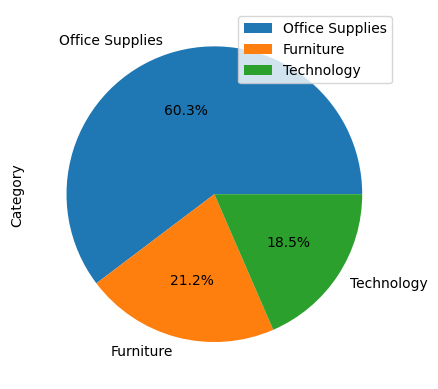

In [15]:
## Number of products in each category 
type_counts = df['Category'].value_counts()


df2 = pd.DataFrame({'Category': type_counts}, 
                     index = [ 'Office Supplies', 'Furniture','Technology'])
            

df2.plot.pie(y='Category', autopct='%1.1f%%')

<Axes: xlabel='Sub-Category', ylabel='count'>

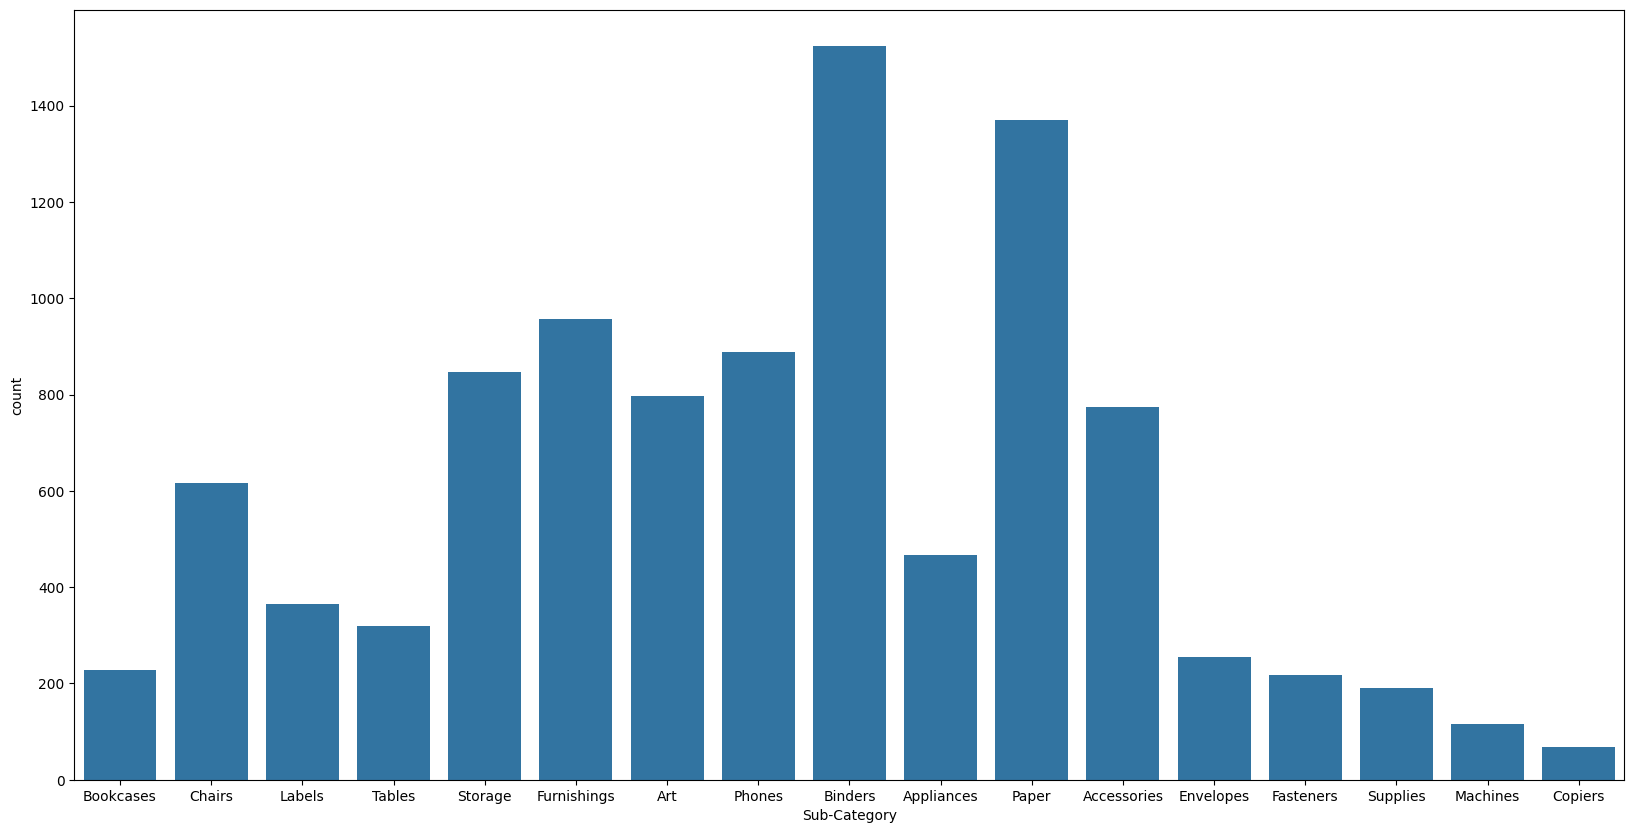

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x='Sub-Category', data=df)

- the store sells a wide variety of 'Office Supplies' especially in the 'Binders' and 'Paper' department

In [17]:
product_Sales = df.groupby(['Product Name']).sum()['Sales']
top_product_Sales = product_Sales.sort_values(ascending=False)
top_product_Sales = top_product_Sales[0 : 5]
top_product_Sales.head()

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64

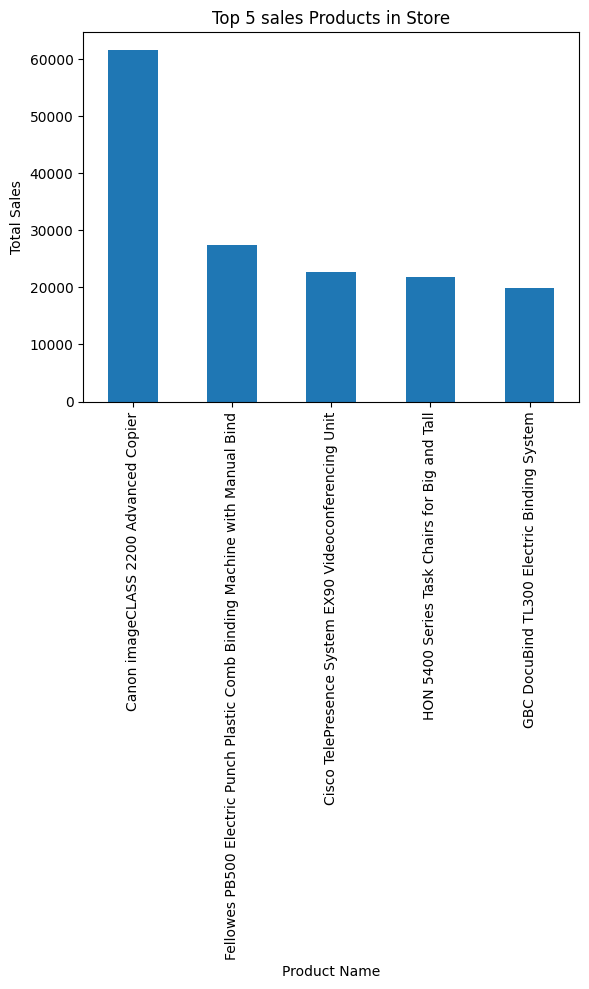

In [18]:
top_product_Sales.plot(kind = 'bar')
plt.title('Top 5 sales Products in Store')
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
# Show the plot
plt.tight_layout()
plt.show()

In [19]:
product_profit = df.groupby(['Product Name']).sum()['Profit']
top_product_profit = product_profit.sort_values(ascending=False)
top_product_profit = top_product_profit[0 :5]
top_product_profit.head()

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Name: Profit, dtype: float64

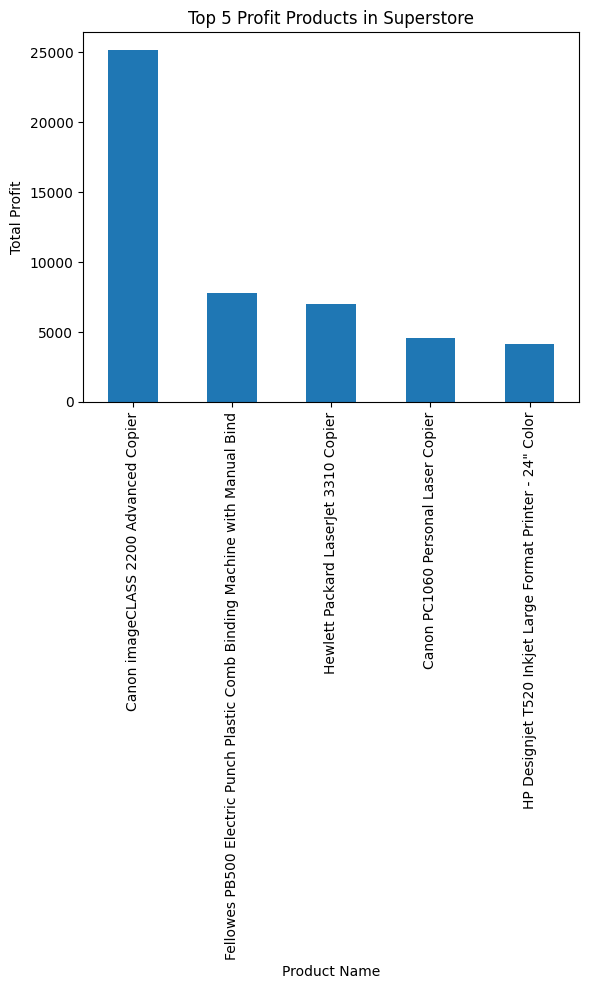

In [20]:
top_product_profit.plot(kind="bar")  
plt.title("Top 5 Profit Products in Superstore")  
plt.xlabel("Product Name")  
plt.ylabel("Total Profit")  
# Show the plot
plt.tight_layout()
plt.show() 

In [21]:
top_product_profit.index == top_product_Sales.index

array([ True,  True, False, False, False])

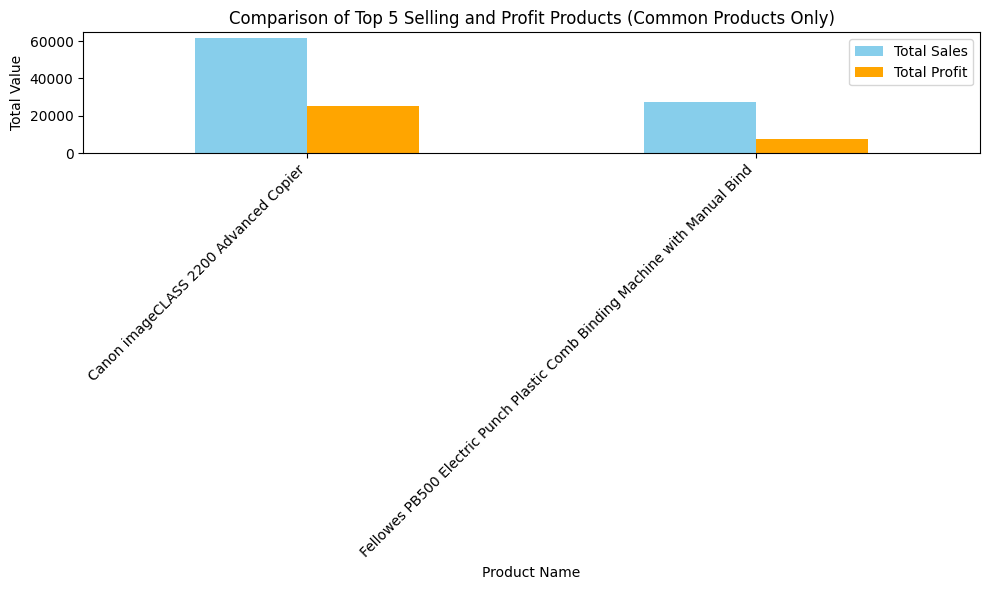

In [22]:
# Create a DataFrame with both metrics
comparison_df = pd.DataFrame({
    'Total Sales': top_product_Sales,
    'Total Profit': top_product_profit
})

common_products = comparison_df[(comparison_df['Total Sales'] > 0) & (comparison_df['Total Profit'] > 0)]

# Plot the comparison only for common products
common_products.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])

# Add a title to the plot
plt.title("Comparison of Top 5 Selling and Profit Products (Common Products Only)")

# Add labels to the x and y axes
plt.xlabel("Product Name")
plt.ylabel("Total Value")

# Add a legend
plt.legend(["Total Sales", "Total Profit"])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()


In [23]:
# Sales and profit by category
category_performance = df.groupby('Category')[['Sales', 'Profit']].sum()
category_performance

Sales       Profit
Category                                 
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008
Technology       836154.0330  145454.9481

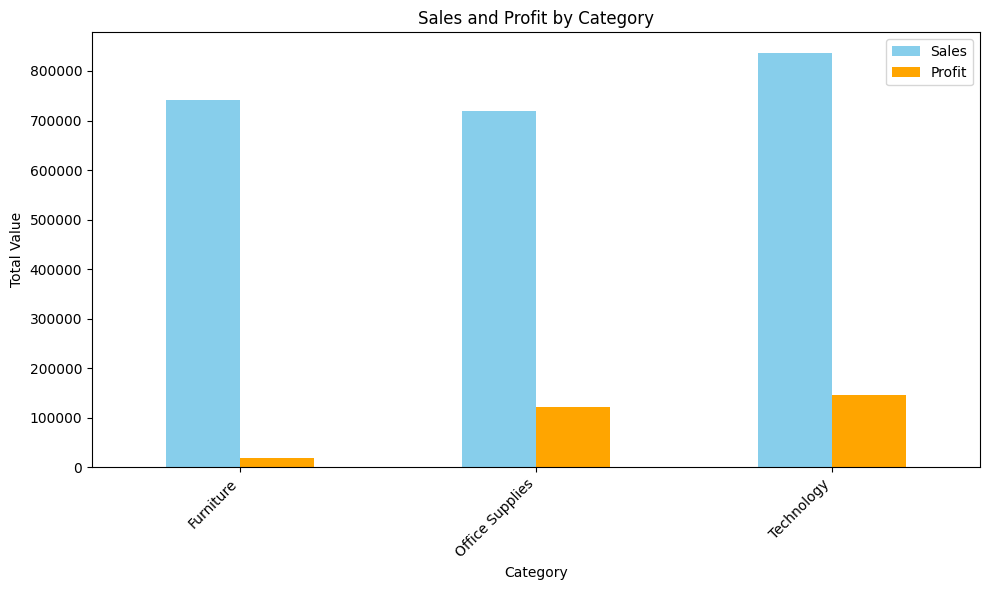

In [24]:
# Visualization
category_performance.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title("Sales and Profit by Category")
plt.xlabel("Category")
plt.ylabel("Total Value")
plt.legend(["Sales", "Profit"])
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [25]:
# Total Sales by Category and Subcategory
category_sales = df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum()
category_sales = category_sales.sort_values(by='Sales', ascending=False)
category_sales = category_sales[0:10]
category_sales

Sales      Profit
Category        Sub-Category                         
Technology      Phones        330007.0540  44515.7306
Furniture       Chairs        328449.1030  26590.1663
Office Supplies Storage       223843.6080  21278.8264
Furniture       Tables        206965.5320 -17725.4811
Office Supplies Binders       203412.7330  30221.7633
Technology      Machines      189238.6310   3384.7569
                Accessories   167380.3180  41936.6357
                Copiers       149528.0300  55617.8249
Furniture       Bookcases     114879.9963  -3472.5560
Office Supplies Appliances    107532.1610  18138.0054

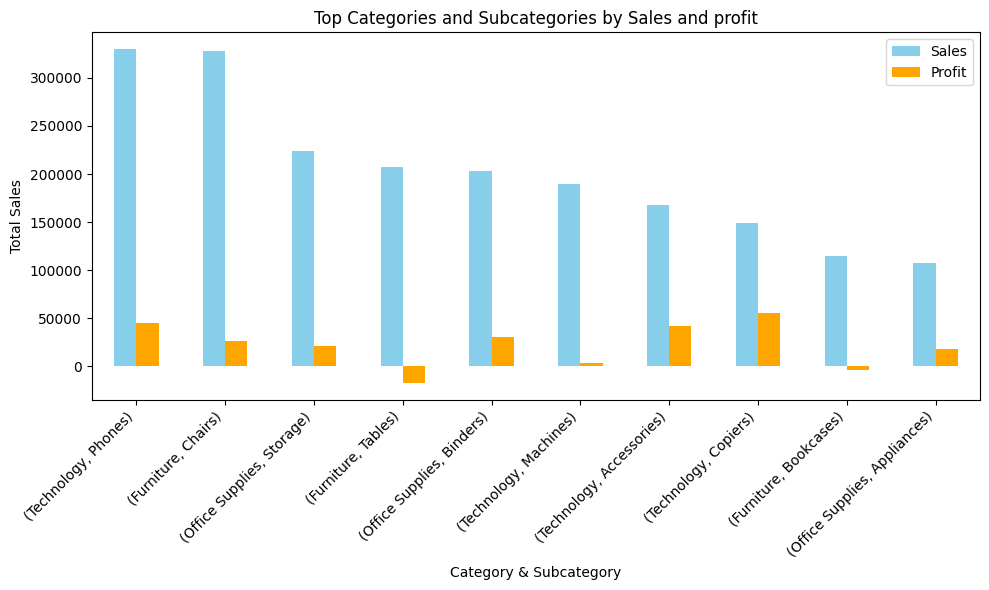

In [26]:
# Visualization
category_sales.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title("Top Categories and Subcategories by Sales and profit")
plt.xlabel("Category & Subcategory")
plt.ylabel("Total Sales")
plt.legend(["Sales", "Profit"])
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

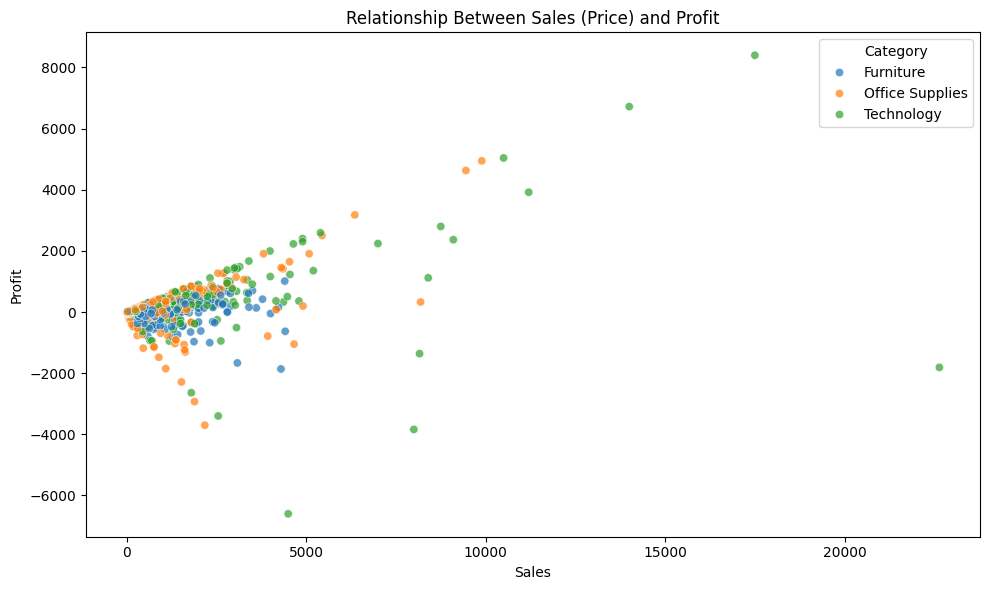

In [27]:
# Scatter plot of sales (proxy for price) vs profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', alpha=0.7)
plt.title("Relationship Between Sales (Price) and Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

- Technology appears to be the most profitable category and could benefit from scaling high-sales products
- Higher sales tend to result in higher profits
- Some transactions have high sales but low or even negative profit (Discounts Effect)


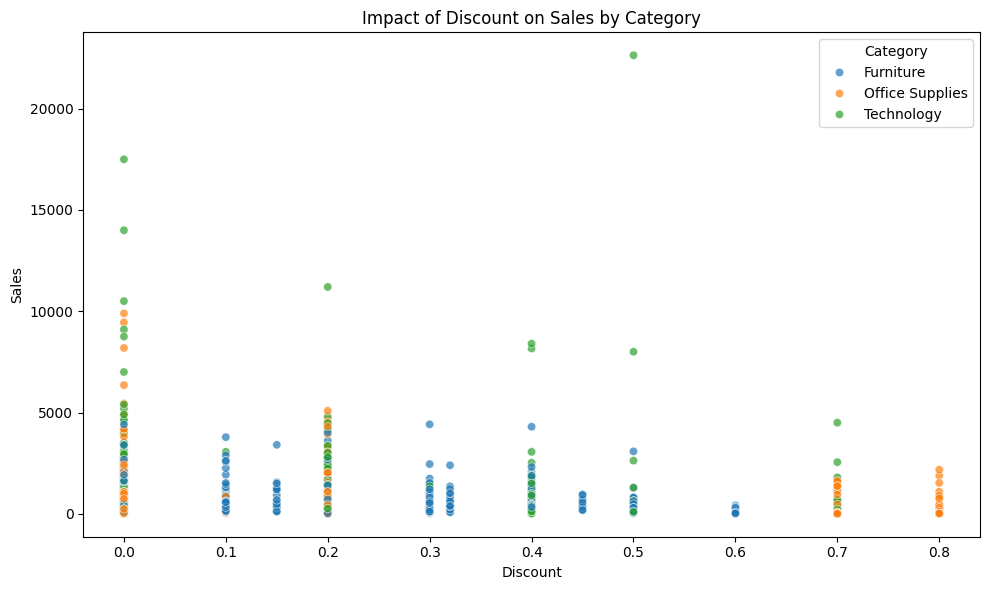

In [28]:
# Scatter plot to visualize impact of Discount on Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Sales', hue='Category', alpha=0.7)
plt.title("Impact of Discount on Sales by Category")
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

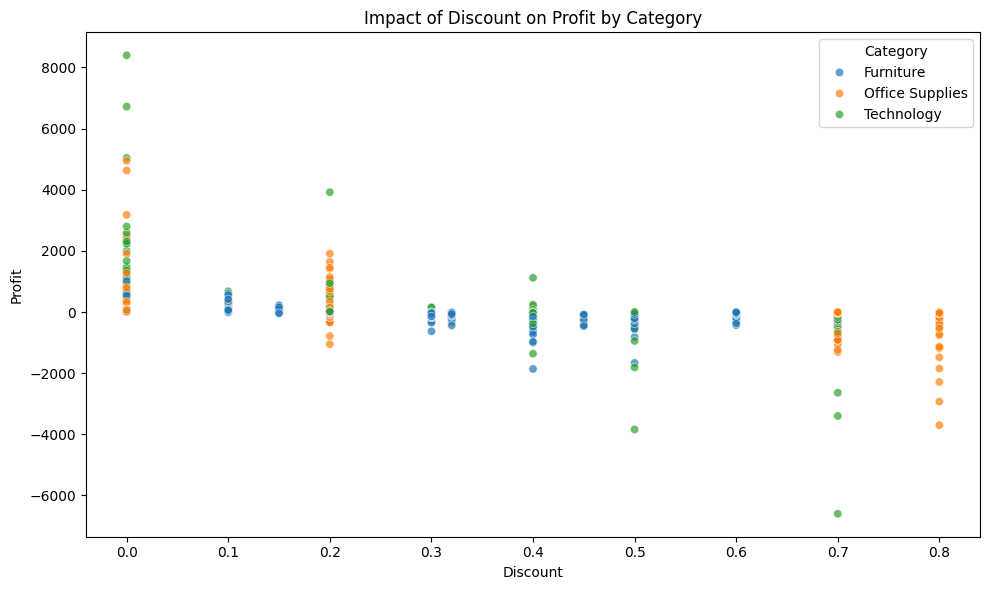

In [29]:
# Scatter plot to visualize impact of Discount on Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.7)
plt.title("Impact of Discount on Profit by Category")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

- Profits turn negative at higher discount levels (above 40%) for all categories
- Discounts between 0%-20% seem to balanced results in both sales and profit for all categories
- Technology: Focus on maintaining lower discounts as it performs well without heavy discounting and achieves the highest profits at 0% discount
- Office Supplies and Furniture: Discounts in the range of 10%-20% may be more effective in driving sales while minimizing profit losses

In [33]:
# Split dataset by region
df_central = df[df['Region']=='Central']
df_east = df[df['Region']== 'East']
df_south = df[df['Region'] == 'South']
df_west = df[df['Region'] == 'West']



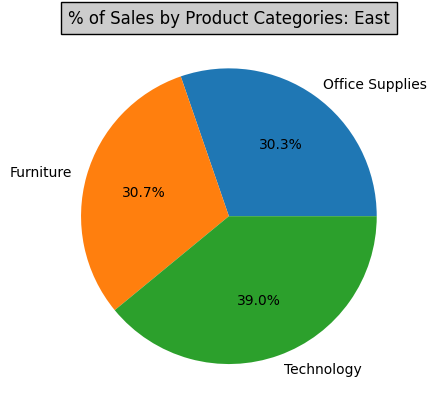

In [34]:
east_category_sales = pd.DataFrame(df_east.groupby('Category')['Sales'].sum())['Sales']

plt_east = pd.DataFrame({'Sales by Category': east_category_sales}, 
                     index = [ 'Office Supplies', 'Furniture','Technology']
                   )

plt.pie(plt_east['Sales by Category'],  labels = plt_east.index, autopct='%1.1f%%')
plt.title("% of Sales by Product Categories: East", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


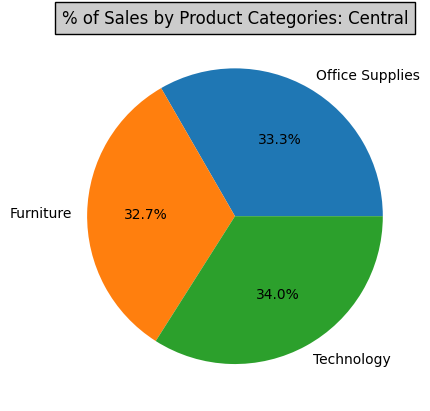

In [35]:
#number of products in each category 
central_category_sales = pd.DataFrame(df_central.groupby('Category')['Sales'].sum())['Sales']

plt_central = pd.DataFrame({'Sales by Category': central_category_sales}, 
                     index = [ 'Office Supplies', 'Furniture','Technology']
                   )

plt.pie(plt_central['Sales by Category'], labels=plt_central.index, autopct='%1.1f%%')
plt.title("% of Sales by Product Categories: Central" , bbox={'facecolor':'0.8', 'pad':5})
plt.show()


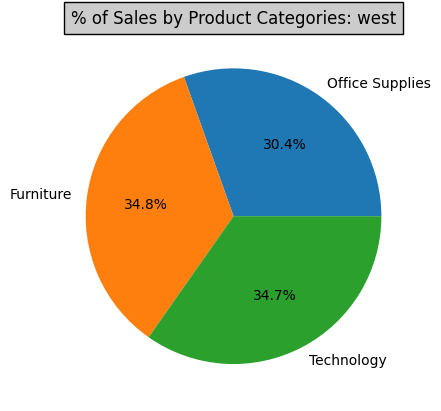

In [36]:
#number of products in each category 
west_category_sales = pd.DataFrame(df_west.groupby('Category')['Sales'].sum())['Sales']

plt_west = pd.DataFrame({'Sales by Category': west_category_sales}, 
                     index = [ 'Office Supplies', 'Furniture','Technology']
                   )

plt.pie(plt_west['Sales by Category'], labels=plt_west.index, autopct='%1.1f%%')
plt.title("% of Sales by Product Categories: west" , bbox={'facecolor':'0.8', 'pad':5})
plt.show()


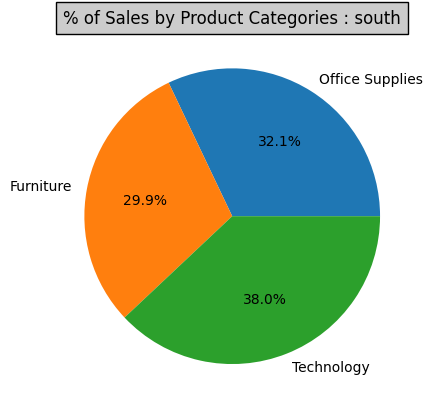

In [37]:
#number of products in each category 
south_category_sales = pd.DataFrame(df_south.groupby('Category')['Sales'].sum())['Sales']

plt_south = pd.DataFrame({'Sales by Category': south_category_sales}, 
                     index = [ 'Office Supplies', 'Furniture','Technology']
                   )

plt.pie(plt_south['Sales by Category'], labels=plt_south.index, autopct='%1.1f%%')
plt.title("% of Sales by Product Categories : south" , bbox={'facecolor':'0.8', 'pad':5})
plt.show()


#### East Region
- 30.3% of products belong to Office Supplies.
- 30.7% of products belong to Furniture.
- 39% of products belong to Technology.
- The proportion of Technology products in the East Region is higher than in the other two categories. 

#### Central Region
- 33.3% of products belong to Office Supplies.
- 32.7% of products belong to Furniture.
- 34% of products belong to Technology.
- The product categories here are evenly distributed. 

#### West Region
- 30.4% of products belong to Office Supplies.
- 34.8% of products belong to Furniture.
- 34.7% of products belong to Technology.

#### South Region
- 32.1% of products belong to Office Supplies.
- 29.9% of products belong to Furniture.
- 38% of products belong to Technology.
- The proportion of Technology products in the South Region is higher than in the other two categories.  

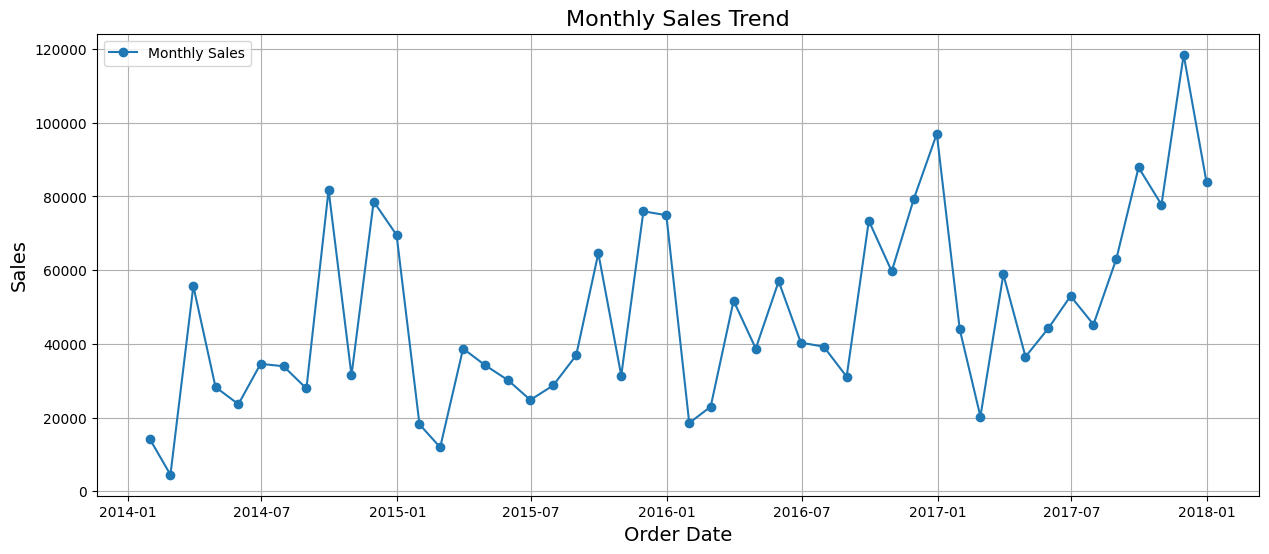

In [38]:
# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by 'Order Date' and sum the numeric columns
monthly_sales = df.groupby(['Order Date'], as_index=False).sum()

# Set the 'Order Date' column as the index of the DataFrame
monthly_sales = monthly_sales.set_index('Order Date')

# Resample the data into monthly intervals
monthly_sales = monthly_sales.resample('M').sum()  # 'M' for month-end frequency

# Plot the monthly sales trend
plt.figure(figsize=(15, 6))
plt.plot(monthly_sales['Sales'], marker='o', linestyle='-', label='Monthly Sales')
plt.xlabel("Order Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("Monthly Sales Trend", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()


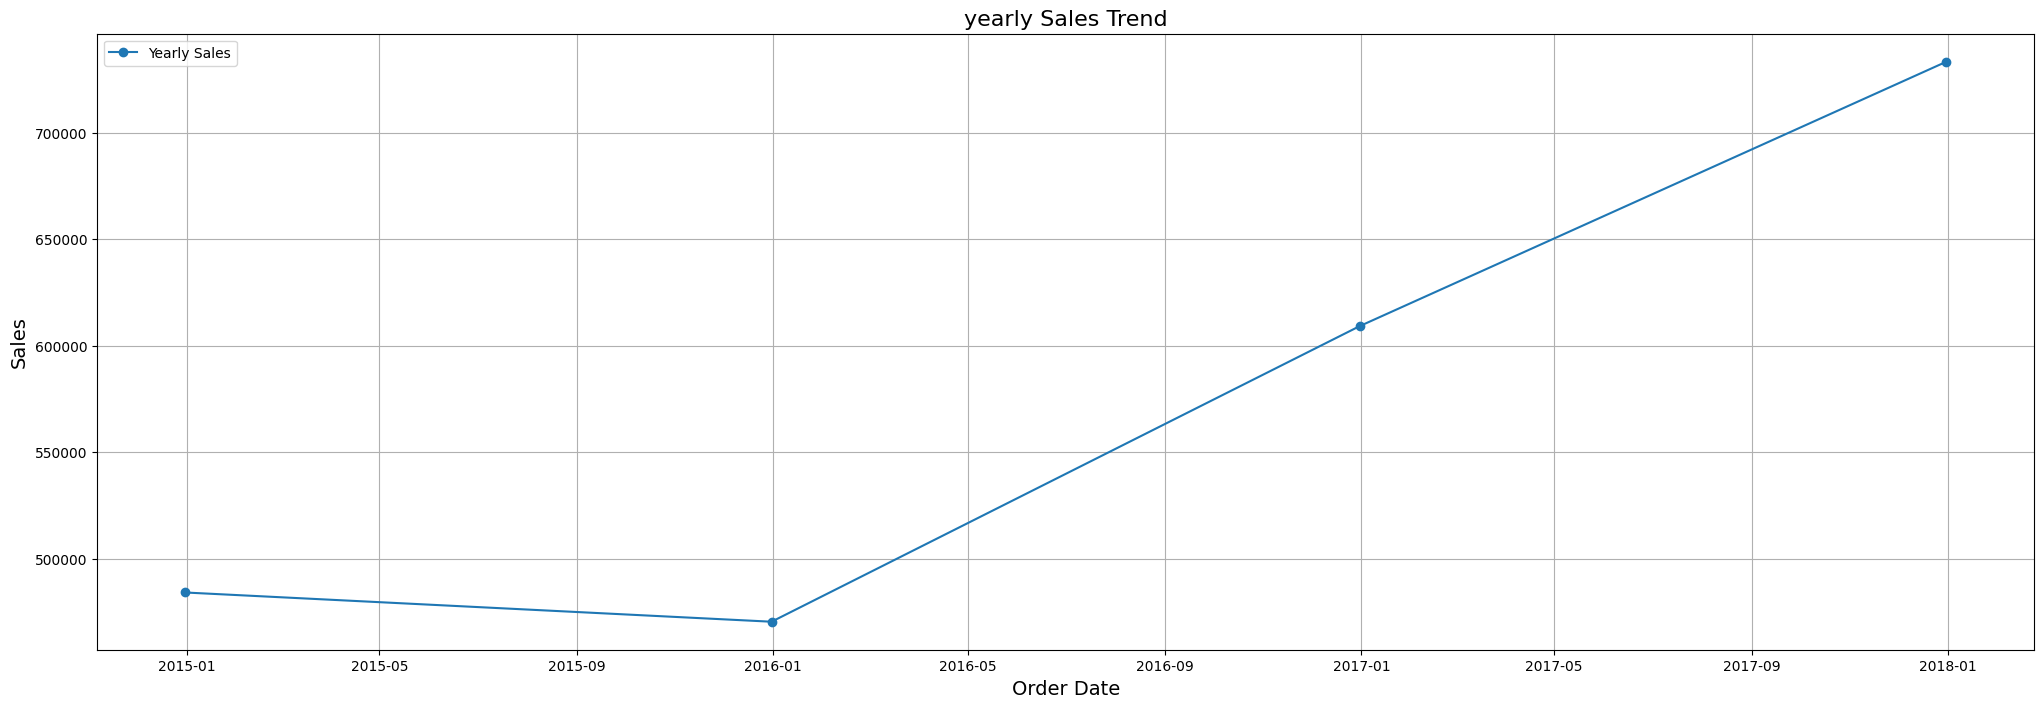

In [39]:
yearly_sales = monthly_sales.resample('Y').sum() 

plt.figure(figsize=(25,8))
plt.plot(yearly_sales['Sales'], marker='o', linestyle='-', label='Yearly Sales')
plt.xlabel("Order Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("yearly Sales Trend", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

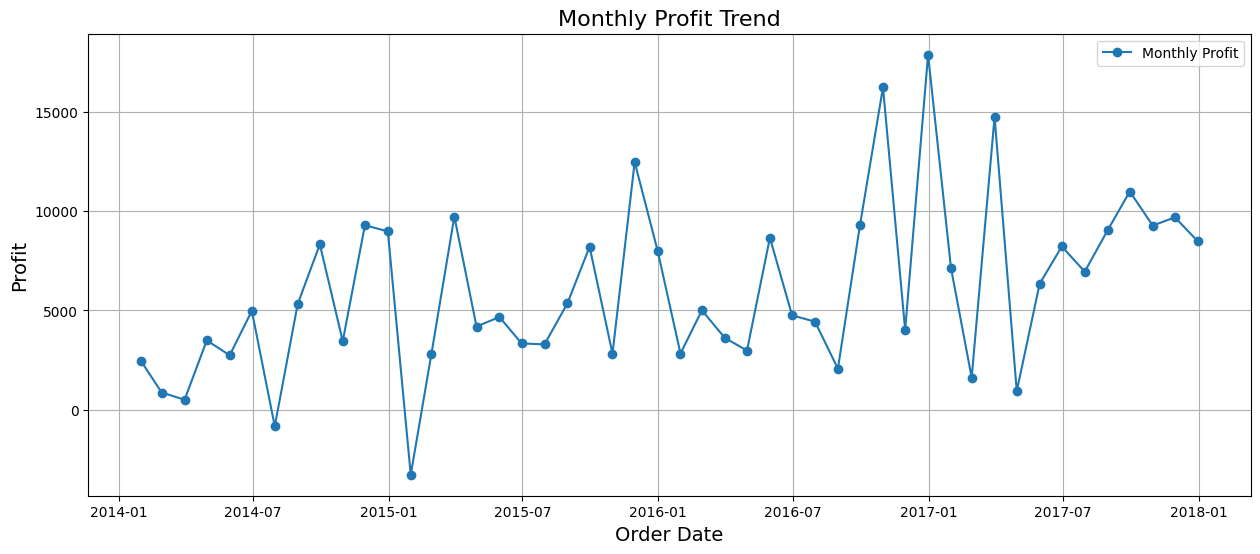

In [40]:
monthly_sales = df.groupby(['Order Date'], as_index=False).sum()

# Set the Order Date column as the index of the dataframe
monthly_sales = monthly_sales.set_index('Order Date')

# Resample the data into monthly intervals
monthly_sales = monthly_sales.resample('M').sum() # M for month

# Plot the monthly profit trend
plt.figure(figsize=(15, 6))
plt.plot(monthly_sales['Profit'], marker='o', linestyle='-', label='Monthly Profit')
plt.xlabel("Order Date", fontsize=14)
plt.ylabel("Profit", fontsize=14)
plt.title("Monthly Profit Trend", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()



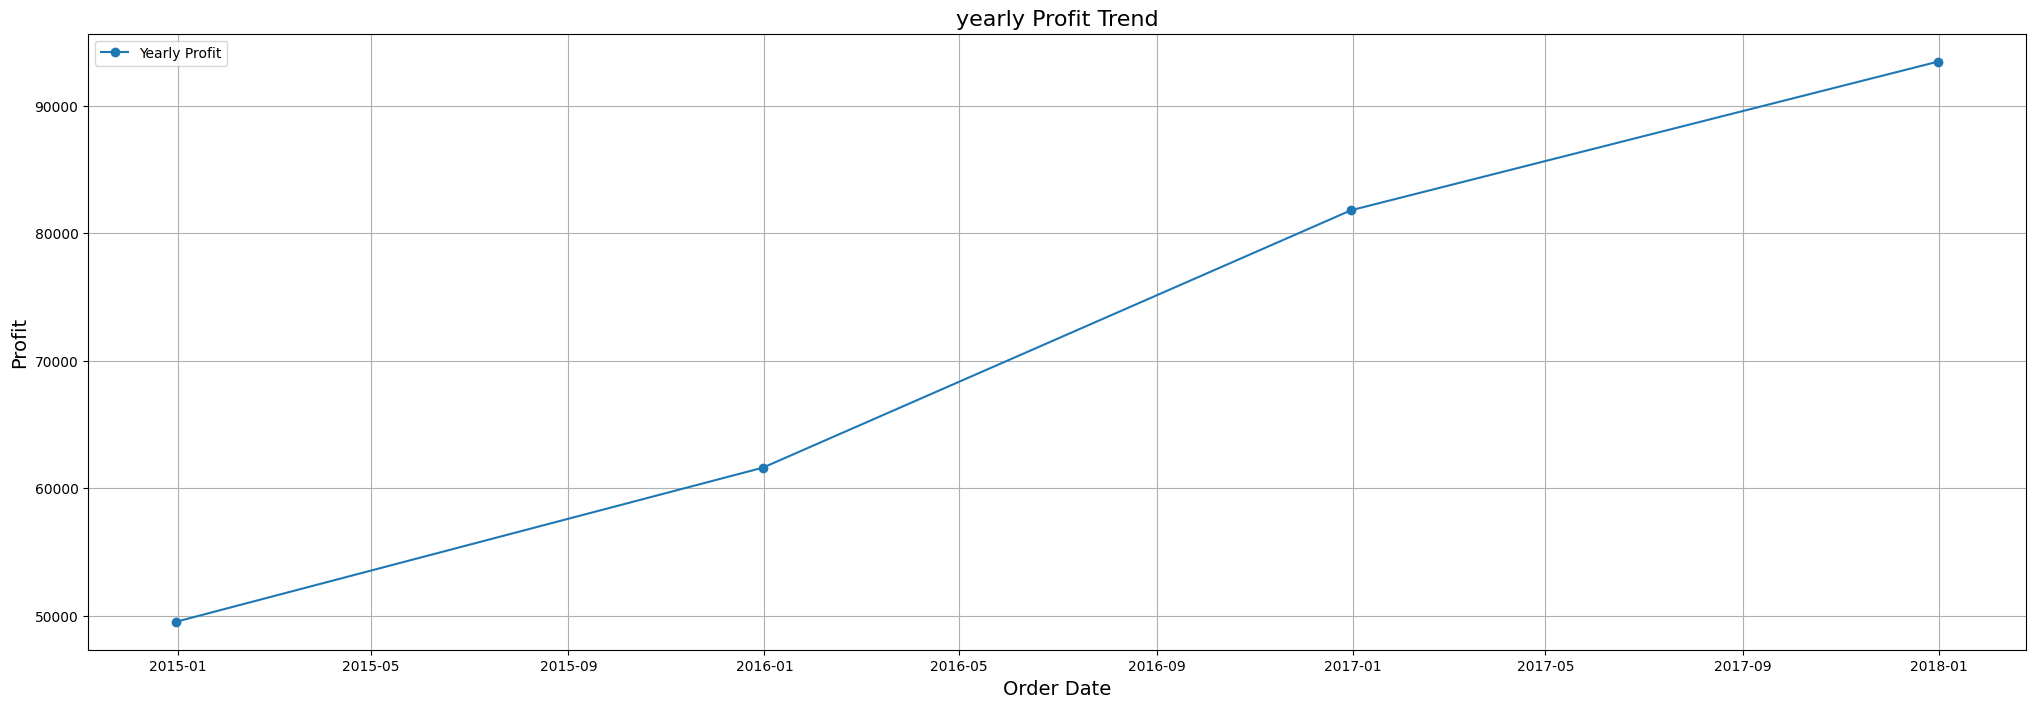

In [41]:
yearly_sales = monthly_sales.resample('Y').sum() 

plt.figure(figsize=(25,8))
plt.plot(yearly_sales['Profit'], marker='o', linestyle='-', label='Yearly Profit')
plt.xlabel("Order Date", fontsize=14)
plt.ylabel("Profit", fontsize=14)
plt.title("yearly Profit Trend", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

In [42]:
df_2014 = df[df['Order Year']==2014]
df_2015 = df[df['Order Year']==2015]
df_2016 = df[df['Order Year']==2016]
df_2017 = df[df['Order Year']==2017]

month_sales_2014 = pd.DataFrame(df_2014.groupby('Order Month')['Sales'].sum())
month_sales_2015 = pd.DataFrame(df_2015.groupby('Order Month')['Sales'].sum())
month_sales_2016 = pd.DataFrame(df_2016.groupby('Order Month')['Sales'].sum())
month_sales_2017 = pd.DataFrame(df_2017.groupby('Order Month')['Sales'].sum())

plt.plot(month_sales_2014['Sales'],label ='2014')
plt.plot(month_sales_2015['Sales'],label ='2015')
plt.plot(month_sales_2016['Sales'],label ='2016')
plt.plot(month_sales_2017['Sales'],label ='2017')
plt.legend()

KeyError: 'Order Year'

- The graph is shown above. It shows an increasing trend of sales within each year and an increasing trend in sales from 2014 to 2017.

According to the graph above, our dataset could use the ARIMA model since it looks like there is a linear relationship between sales and years. However, we need to exclude the trend and seasonal effects to get a stationary dataset.

We could forecast the year for 2018 by each category or sub-category. Below, we take the furniture sales as an example.


- We will use the averages daily sales value to represent that month, and we are using the start of each month as the timestamp.


- We first analyse the time series of Furniture Sales followed by other categories.

In [54]:
furniture = df.loc[df['Category'] == 'Furniture']

# This shows that we have time-series data of 4 years for furniture sales.
print(furniture['Order Date'].min())
furniture['Order Date'].max()

2014-01-06 00:00:00


Timestamp('2017-12-30 00:00:00')

In [55]:
cols = ['Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
        'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity',
        'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)

In [56]:
# furniture data
furniture.sort_values('Order Date')
furniture.isna().sum()

Order Date    0
Sales         0
Year          0
Month         0
dtype: int64

In [57]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

- Indexing time-series data 

In [58]:
furniture = furniture.set_index('Order Date')
#furniture = furniture.apply(lambda x: x.set_index('Order Date'))
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [ ]:
furniture = furniture.set_index('Order Date')
#furniture = furniture.apply(lambda x: x.set_index('Order Date'))
furniture.index

In [60]:
# Averaging Daily Sales
y = furniture['Sales'].resample('MS').mean()

In [61]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

<Axes: xlabel='Order Date'>

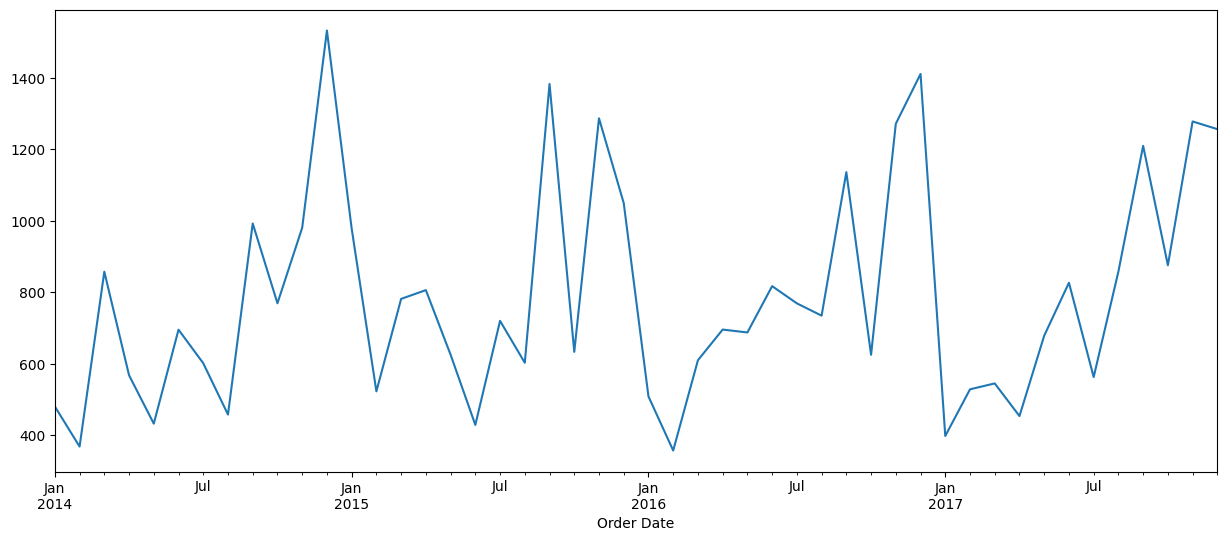

In [62]:
y.plot(figsize=(15, 6))

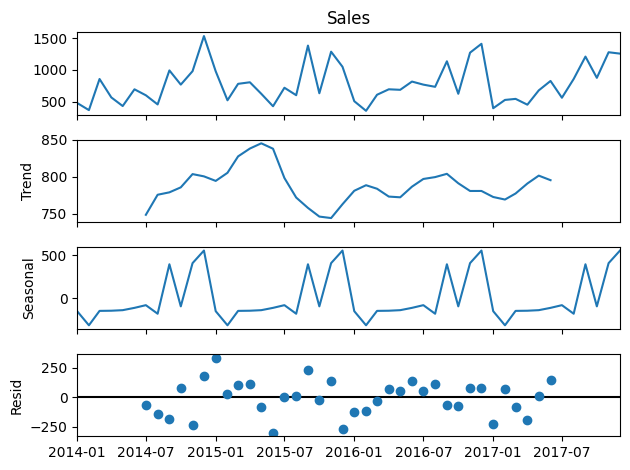

In [63]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

- The above plot shows that the sales of furniture is highly unstable with seasonality and trend easily observable.

- Time Series forecasting with ARIMA Model
- 
- ARIMA models are donated with the notation: ARIMA (p, d, q) where:
- p denotes seasonality
- d denotes trend
- q denotes noise in data

- Configuring a SARIMA requires selecting hyperparameters for both the trend and seasonal components of the series.

Trend Components:
* p denotes Trend autoregression order
* d denotes Trend difference order
* q denotes Trend moving average order

Seasonality Components:
* p denotes Seasonal autoregressive order.
* d denotes Seasonal difference order.
* q denotes Seasonal moving average order.
* m denotes the number of time steps for a single seasonal period.

In [64]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Few parameter combinations are:')
print('{} x {}'.format(pdq[1], seasonal_pdq[1]))
print('{} x {}'.format(pdq[2], seasonal_pdq[2]))

Few parameter combinations are:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


- Now that we've generated all possible parameters for our SARIMA model, we shall find out the best parameter to train the model on it finally. :)

- SARIMA stands for **Seasonal AutoRegressive Integrated Moving Average** model which is an extension of ARIMA model used in modeling the seasonality - - component as well. So, we need not to make time-series stationary (non-seasonal) first before forecasting. 

In [65]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue



ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1525.3374802904166
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:477.71701309212006


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:302.2702899793675
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:497.2314433418338
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1432.691994012685
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:304.24882803028567
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:720.92522707581
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2712.4319608848564
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:466.5607429809145


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:291.6261389673301
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:499.58424534967315
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2586.781192804742
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:319.98848769468657


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:291.872557648561
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:677.8947668414504


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1412.6976902107317
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:486.6378567289681
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:304.96712281679567
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:497.7889663004408


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1043.374154121225
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:319.7714068109212
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:306.91132001514256
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:649.9056176817297


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1190.3786037220204
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:458.87055484828534
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:279.5806233355798
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:486.18329774427696


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1336.0569978496287
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:310.7574368417304
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:281.5576621461244
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:692.1645522067713
ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1516.1835718983882
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:479.4632147852136


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:304.20776751609674
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:480.92593679351927
ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1363.8949213122505
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:304.4664675084583
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:304.5842692143874
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:665.7794442186972


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:2561.557840953918
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:468.3685195815011
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:293.34221939659494
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:482.5763323876944
ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:2544.2422630186265


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:306.0156002117546
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:293.7513188120164
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:671.2513547541902
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1863.3831818501496
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:479.2003422281136
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:300.2130611619093
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:475.3403658784325


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1519.4978491682564
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:300.6270901345404
ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:302.3264992509151
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:649.0318019835765
ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:316.9032080573468


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:460.4762687610683
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:281.38730069394
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:469.5250354660841
ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1105.919777756484


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:297.78754395346493
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:283.36610171003014


- We got the lowest AIC value: 297.788 for ARIMA(1, 1, 1)x(1, 1, 0, 12). We shall use these best params in our model.

- Here, the **Akaike information criterion (AIC)** is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

- AIC estimates the relative amount of information lost by a given model: the less information a model loses (less AIC value), the higher the quality of that model.

In [66]:
# Training the ARIMA model.
model = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12), enforce_stationarity=False,
                                            enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2527      0.141      1.794      0.073      -0.023       0.529
ma.L1         -1.0000      0.211     -4.732      0.000      -1.414      -0.586
sigma2       8.78e+04   2.41e-06   3.65e+10      0.000    8.78e+04    8.78e+04


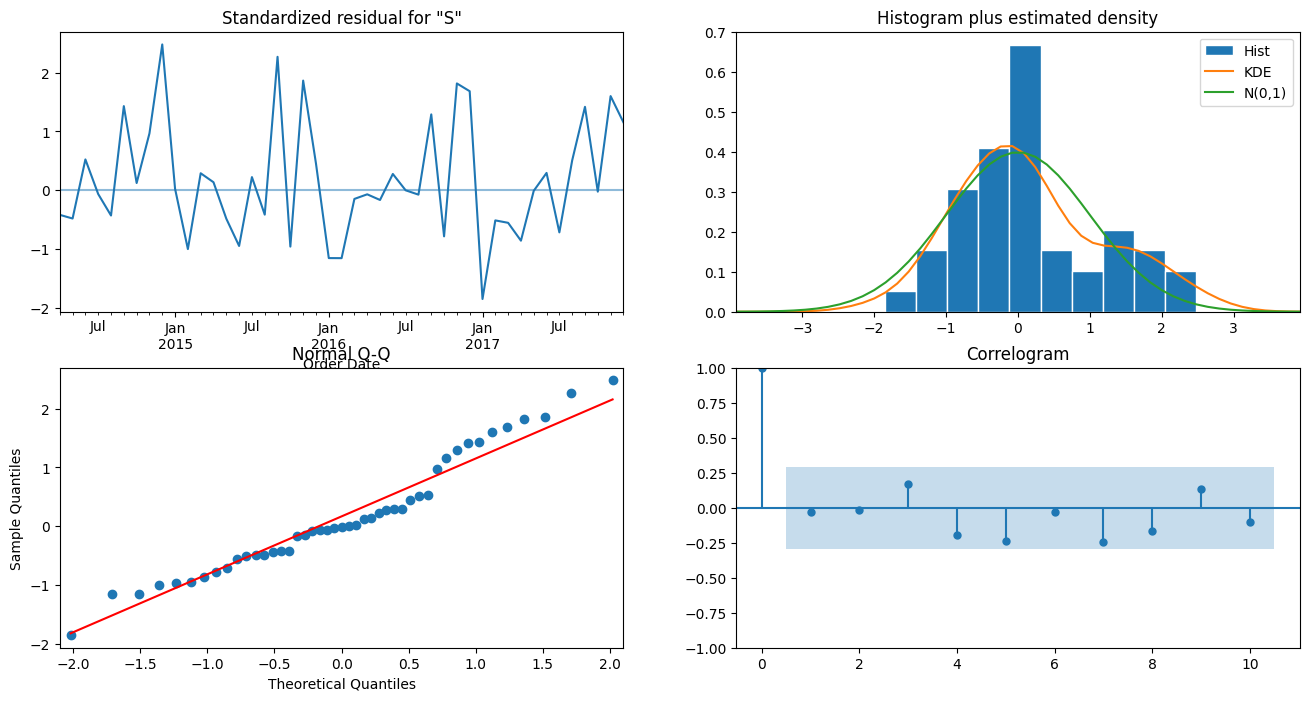

In [67]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16, 8))
plt.show()

- The above plots suggest that the Model Residuals are nearly Normally Distributed.

To validate the model results, we compare the actual sales with the predicted sales of the time series data starting
from 2017/01/01 till the end of the data.

            lower Sales  upper Sales
Order Date                          
2017-01-01   364.987442  1542.928797
2017-02-01    93.766452  1271.255408
2017-03-01   122.817830  1299.878625
2017-04-01   122.812203  1299.467177
2017-05-01    93.316259  1269.586050
2017-06-01   150.282575  1326.186283
2017-07-01   190.045785  1365.601126
2017-08-01   118.395694  1293.619126
2017-09-01   196.719915  1371.626759
2017-10-01   295.380207  1469.984746
2017-11-01   210.918911  1385.234482
2017-12-01   323.173188  1497.212266


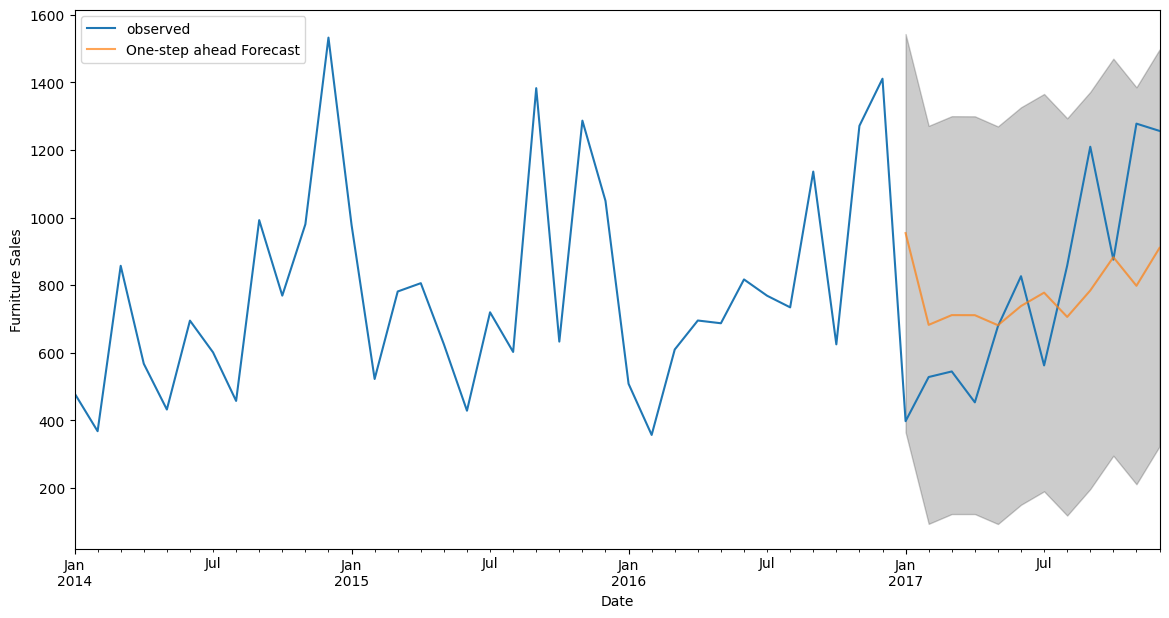

In [68]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The above plot demonstrates that the predicted values alligns well with the true values capturing an upward seasonality. Now, we calculate the Mean Square Error of our predicted values wrt the orignal values.

In [69]:
y_predicted = pred.predicted_mean
y_true = y['2017-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))
print('Root Mean Square Error is:', np.sqrt(mse))

Mean Square Error is: 86310.9063
Root Mean Square Error is: 293.78717861109243


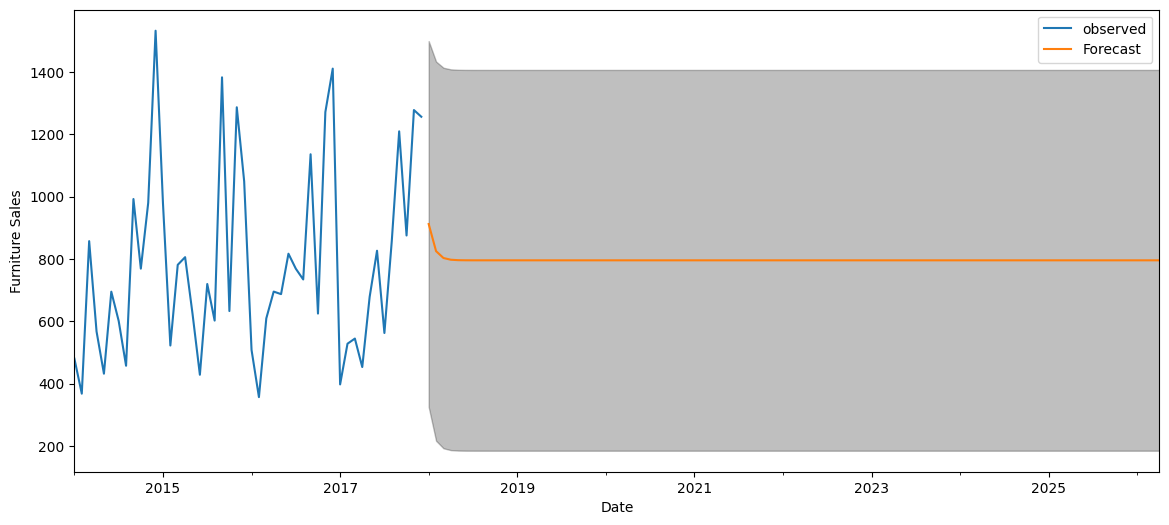

In [70]:
# Forecasting the future (out of sample) values.
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

- Here, note that the confidence interval is increasing as we move further into the future. The model becomes less confident in predicting the values as we move ahead.
- Our data has 3 categories: 'Furniture', 'Office Supplies' and, 'Technology'. Let's compare the 'Furniture' and 'Office Supplies' time series.

In [71]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 22), (6026, 22))

In [72]:
cols = ['Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()

furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})

In [73]:
# Now, let's merge both the time series for comparison.
store = furniture.merge(office, on='Order Date', how='inner')
store.rename(columns={'Sales_x': 'Furniture Sales', 'Sales_y': 'Office Sales'}, inplace=True)
store.head()

Order Date  Furniture Sales  Office Sales
0 2014-01-01       480.194231    285.357647
1 2014-02-01       367.931600     63.042588
2 2014-03-01       857.291529    391.176318
3 2014-04-01       567.488357    464.794750
4 2014-05-01       432.049188    324.346545

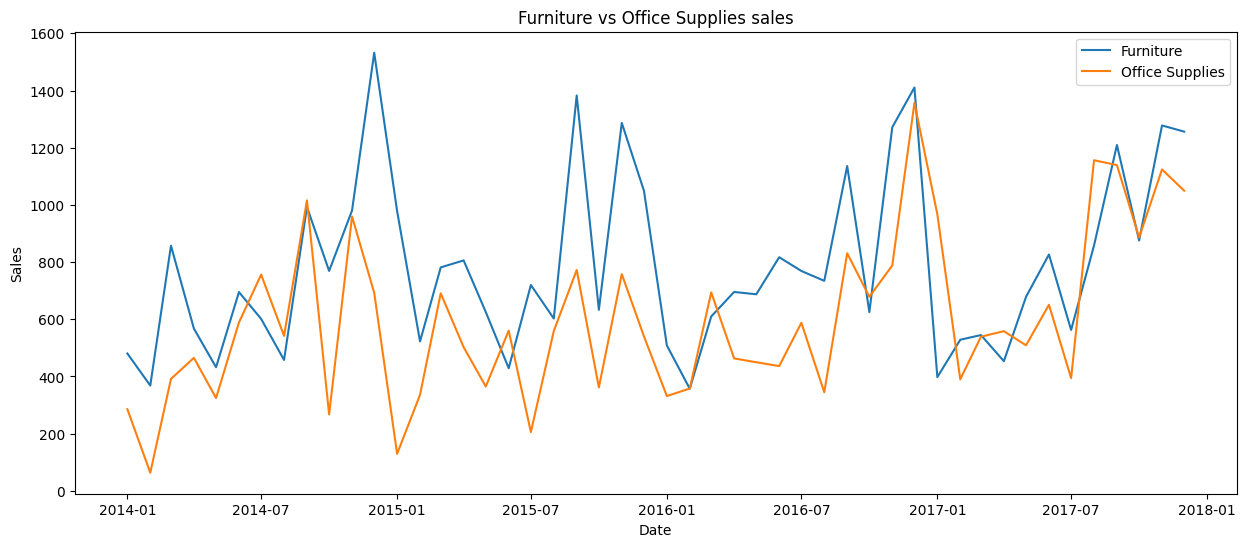

In [74]:
plt.figure(figsize=(15, 6))
plt.plot(store['Order Date'], store['Furniture Sales'], label='Furniture')
plt.plot(store['Order Date'], store['Office Sales'], label='Office Supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Office Supplies sales')
plt.legend()

## Teem Members
- Ahmed Fany Fathy   202200721
- Adham Ibraheem     202201929
- Sirag eldein asem  202202723

# Data understanding

Context
With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

You can even take this a step further and try and build a Regression model to predict Sales or Profit.

Go crazy with the dataset, but also make sure to provide some business insights to improve.

Metadata
- Row ID => Unique ID for each row.
- Order ID => Unique Order ID for each Customer.
- Order Date => Order Date of the product.
- Ship Date => Shipping Date of the Product.
- Ship Mode=> Shipping Mode specified by the Customer.
- Customer ID => Unique ID to identify each Customer.
- Customer Name => Name of the Customer.
- Segment => The segment where the Customer belongs.
- Country => Country of residence of the Customer.
- City => City of residence of of the Customer.
- State => State of residence of the Customer.
- Postal Code => Postal Code of every Customer.
- Region => Region where the Customer belong.
- Product ID => Unique ID of the Product.
- Category => Category of the product ordered.
- Sub-Category => Sub-Category of the product ordered.
- Product Name => Name of the Product
- Sales => Sales of the Product.
- Quantity => Quantity of the Product.
- Discount => Discount provided.
- Profit => Profit/Loss incurred.

### Data Wrangling and Descriptive Data Analysis

In [77]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
%matplotlib inline

In [78]:
# Read the data
df = pd.read_csv('Superstore.csv' , encoding='windows-1252')
pd.options.display.max_columns = None # to shaow all coulmn
pd.options.display.max_rows = None # to shaow all raws
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0        42420  South  FUR-BO-10001798        Furniture    Bookcases   
1        42420  South  FUR-CH-10000454        Furniture       Chairs   
2        90036   West  OFF-LA-10000240  Office Supplies       Labels   
3        33311  South  FUR-TA-10000577        Furniture       Tables   
4        33311  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [79]:
#How many columns and rows 
df.shape

(9994, 21)

In [80]:
# Details of data tyoes for each variable in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [81]:
# Check if there are any missing values in the data
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [82]:
# Check if there are any duplicated values in the data
df.duplicated().sum()

np.int64(0)

In [83]:
# Dropping  Row ID column and assigning to df
df=df.drop('Row ID',axis=1)


In [84]:
# Numerical Data Description
df.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

- Mean Sales: The average sales amount is $229.86

- Maximum Sales: The highest sales amount is $22,638.48 higher than the mean may be potential outliers

- Sales Distribution: The large standard deviation ($623.25) indicates high variability in sales

- No Discount: At least 25% of records (Q1 = 0) have no discount applied

- Losses: The minimum value indicates a loss of $-6,599.98 meaning some transactions resulted in significant losses

<Axes: xlabel='Profit'>

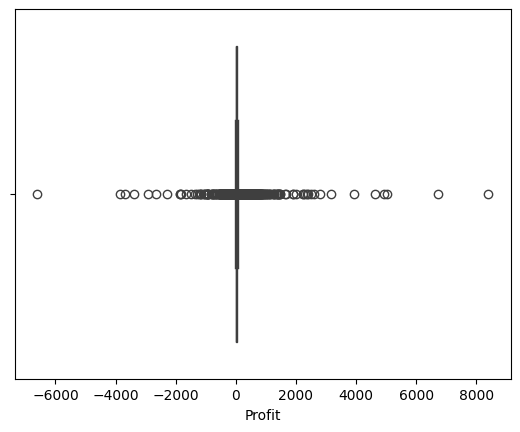

In [85]:
sns.boxplot(x='Profit', data=df, orient="v")

<Axes: xlabel='Sales'>

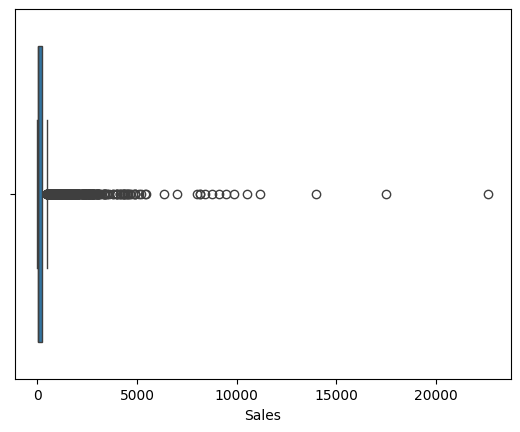

In [86]:
sns.boxplot(x='Sales', data=df, orient="v")

- After checking the boxplots and the dataset, there is no significant outlier in variable Sales and Profit. 

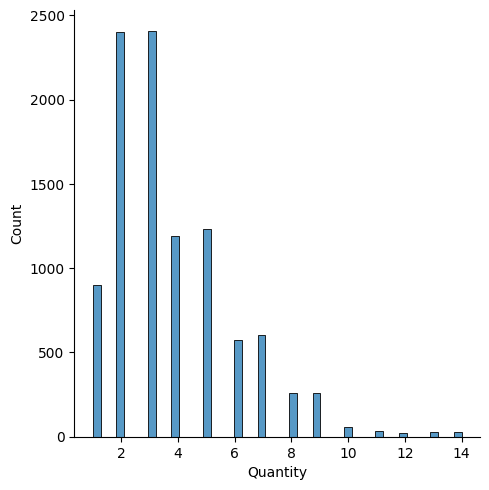

In [87]:
sns.displot(df['Quantity'], kde=False)

- The frequency distribution of Quantity is positively skewed. Most customers order 2-5 individual products and only a few customers order more than 8 individual products at a time.


### Categorical Data Analysis

In [88]:
# let's collect categorical data in dataframe
df_categ = df[[ 'Ship Mode', 'Customer ID', 'Customer Name',
             'Segment', 'Country', 'City', 'State', 'Region',
             'Product ID', 'Category', 'Sub-Category', 'Product Name']]
df_categ.head()

Ship Mode Customer ID    Customer Name    Segment        Country  \
0    Second Class    CG-12520      Claire Gute   Consumer  United States   
1    Second Class    CG-12520      Claire Gute   Consumer  United States   
2    Second Class    DV-13045  Darrin Van Huff  Corporate  United States   
3  Standard Class    SO-20335   Sean O'Donnell   Consumer  United States   
4  Standard Class    SO-20335   Sean O'Donnell   Consumer  United States   

              City       State Region       Product ID         Category  \
0        Henderson    Kentucky  South  FUR-BO-10001798        Furniture   
1        Henderson    Kentucky  South  FUR-CH-10000454        Furniture   
2      Los Angeles  California   West  OFF-LA-10000240  Office Supplies   
3  Fort Lauderdale     Florida  South  FUR-TA-10000577        Furniture   
4  Fort Lauderdale     Florida  South  OFF-ST-10000760  Office Supplies   

  Sub-Category                                       Product Name  
0    Bookcases                  Bush Somerset Collection Bookcase  
1       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  
2       Labels  Self-Adhesive Address Labels for Typewriters b...  
3       Tables      Bretford CR4500 Series Slim Rectangular Table  
4      Storage                     Eldon Fold 'N Roll Cart System

In [89]:
## Number of products in each category 
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [90]:
## Number of  Sub-categorie in each category 
for i in df_categ:
    print(i , ':', df[i].nunique())

Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 531
State : 49
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1850


<Axes: ylabel='Category'>

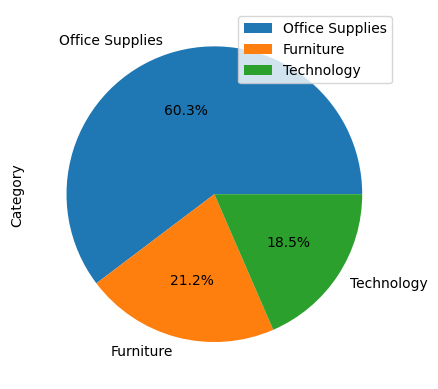

In [91]:
## Number of products in each category 
type_counts = df['Category'].value_counts()


df2 = pd.DataFrame({'Category': type_counts}, 
                     index = [ 'Office Supplies', 'Furniture','Technology'])
            

df2.plot.pie(y='Category', autopct='%1.1f%%')

<Axes: xlabel='Sub-Category', ylabel='count'>

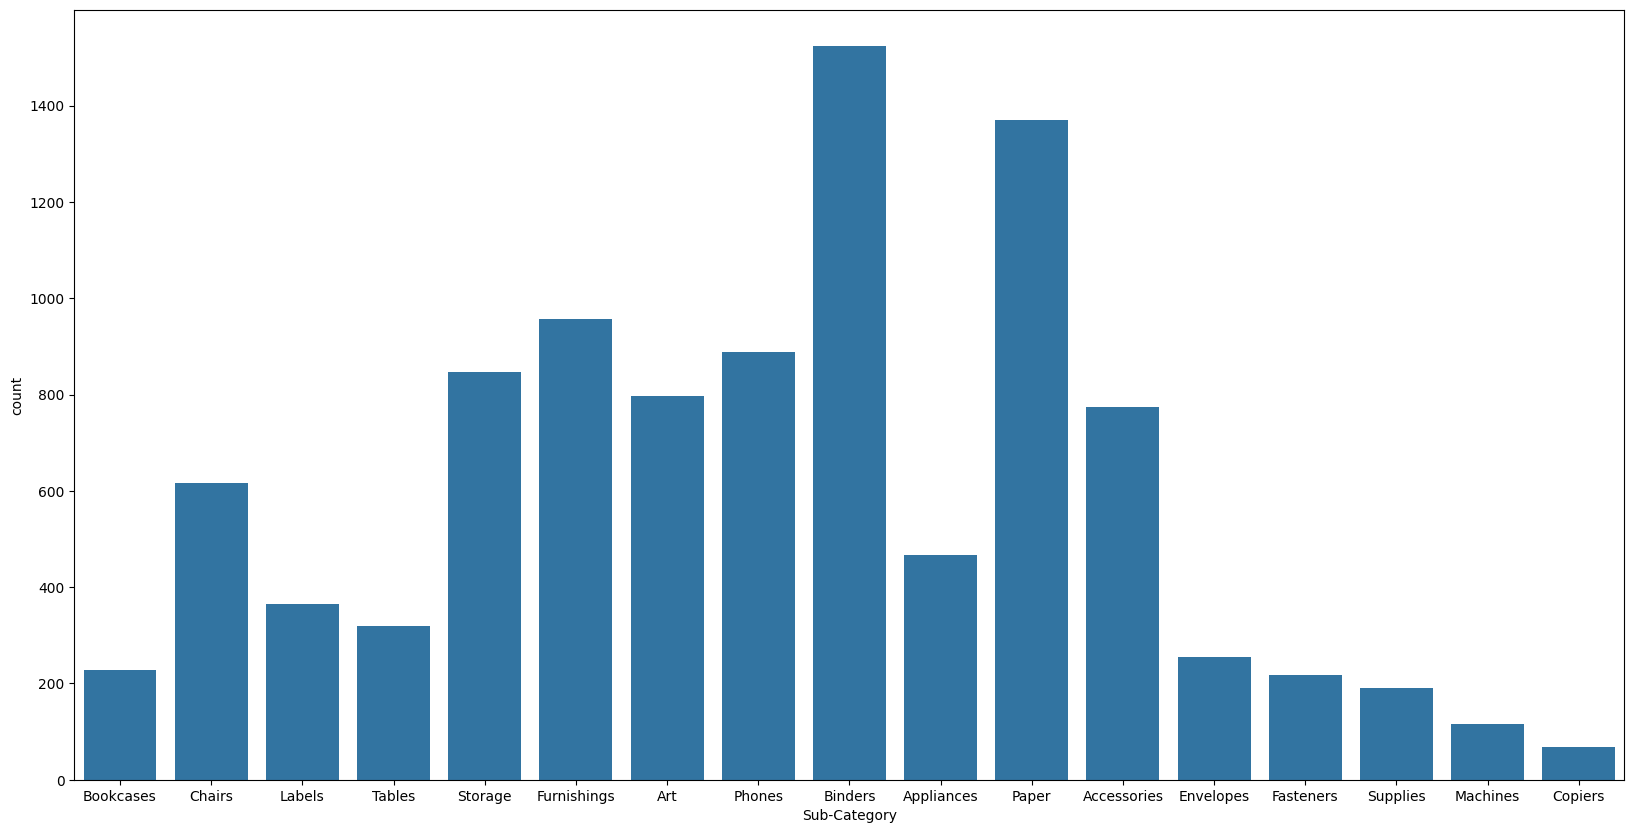

In [92]:
plt.figure(figsize=(20,10))
sns.countplot(x='Sub-Category', data=df)

- the store sells a wide variety of 'Office Supplies' especially in the 'Binders' and 'Paper' department

### What are the top 5 selling products in the store?

In [93]:
product_Sales = df.groupby(['Product Name']).sum()['Sales']
top_product_Sales = product_Sales.sort_values(ascending=False)
top_product_Sales = top_product_Sales[0 : 5]
top_product_Sales.head()

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64

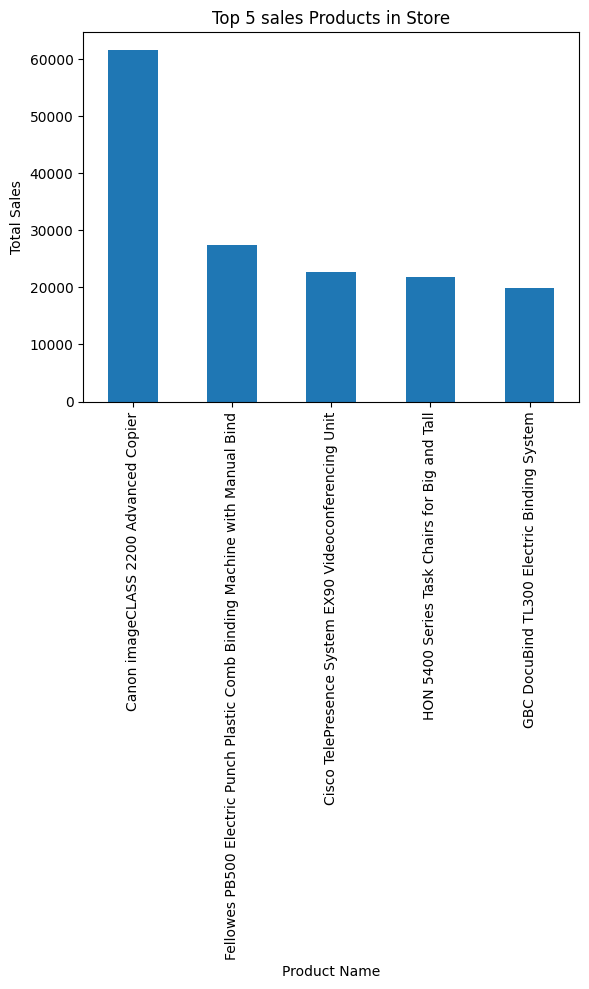

In [94]:
top_product_Sales.plot(kind = 'bar')
plt.title('Top 5 sales Products in Store')
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
# Show the plot
plt.tight_layout()
plt.show()

### What are the top 5 profit products in the store?

In [95]:
product_profit = df.groupby(['Product Name']).sum()['Profit']
top_product_profit = product_profit.sort_values(ascending=False)
top_product_profit = top_product_profit[0 :5]
top_product_profit.head()

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Name: Profit, dtype: float64

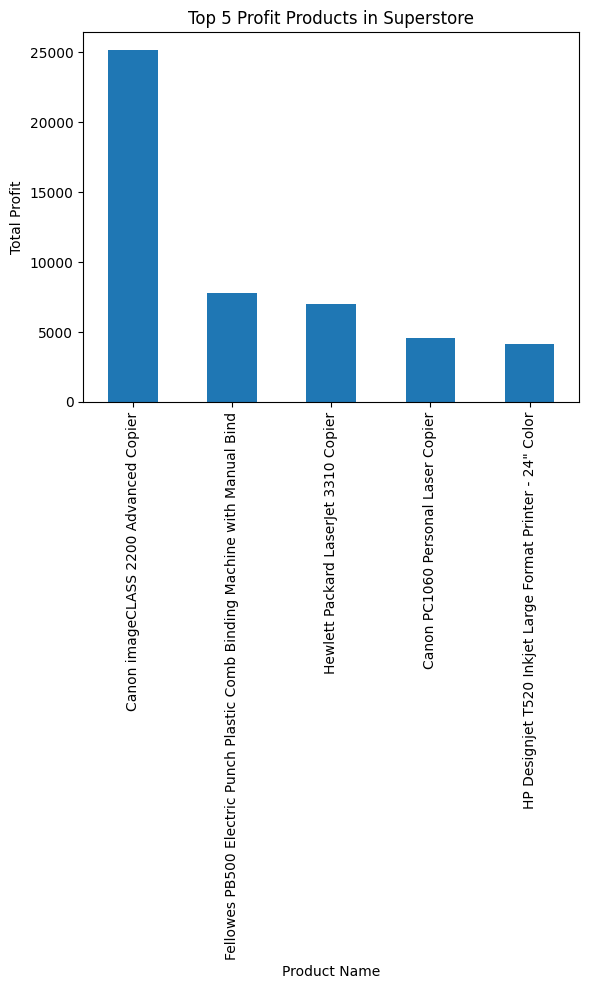

In [96]:
top_product_profit.plot(kind="bar")  
plt.title("Top 5 Profit Products in Superstore")  
plt.xlabel("Product Name")  
plt.ylabel("Total Profit")  
# Show the plot
plt.tight_layout()
plt.show() 

### Compare the top 5 selling products and top 5 profit products

In [97]:
top_product_profit.index == top_product_Sales.index

array([ True,  True, False, False, False])

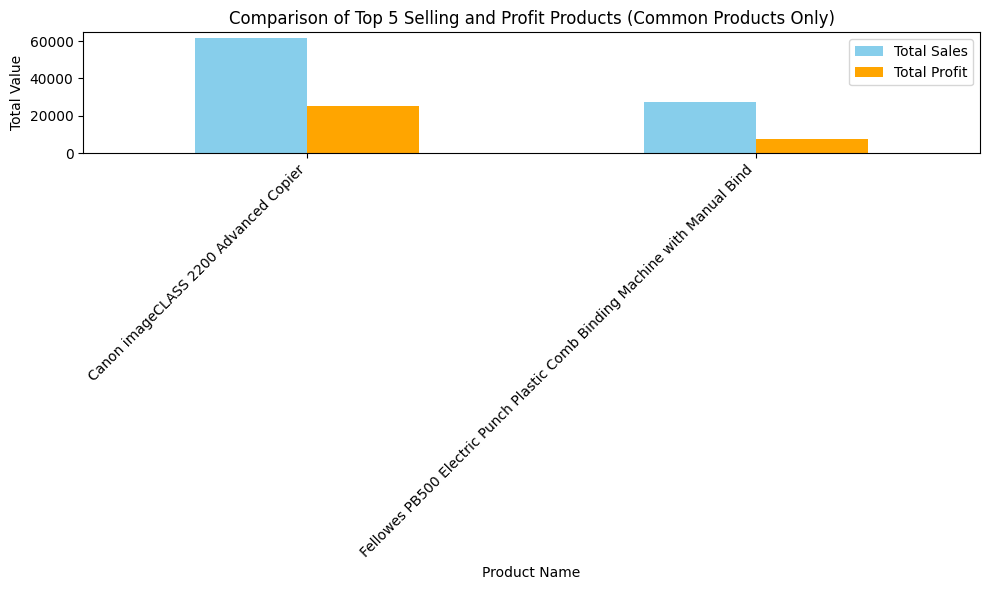

In [98]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with both metrics
comparison_df = pd.DataFrame({
    'Total Sales': top_product_Sales,
    'Total Profit': top_product_profit
})

common_products = comparison_df[(comparison_df['Total Sales'] > 0) & (comparison_df['Total Profit'] > 0)]

# Plot the comparison only for common products
common_products.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])

# Add a title to the plot
plt.title("Comparison of Top 5 Selling and Profit Products (Common Products Only)")

# Add labels to the x and y axes
plt.xlabel("Product Name")
plt.ylabel("Total Value")

# Add a legend
plt.legend(["Total Sales", "Total Profit"])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()


### Sales and Profit Trends by Category

In [99]:
# Sales and profit by category
category_performance = df.groupby('Category')[['Sales', 'Profit']].sum()
category_performance

Sales       Profit
Category                                 
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008
Technology       836154.0330  145454.9481

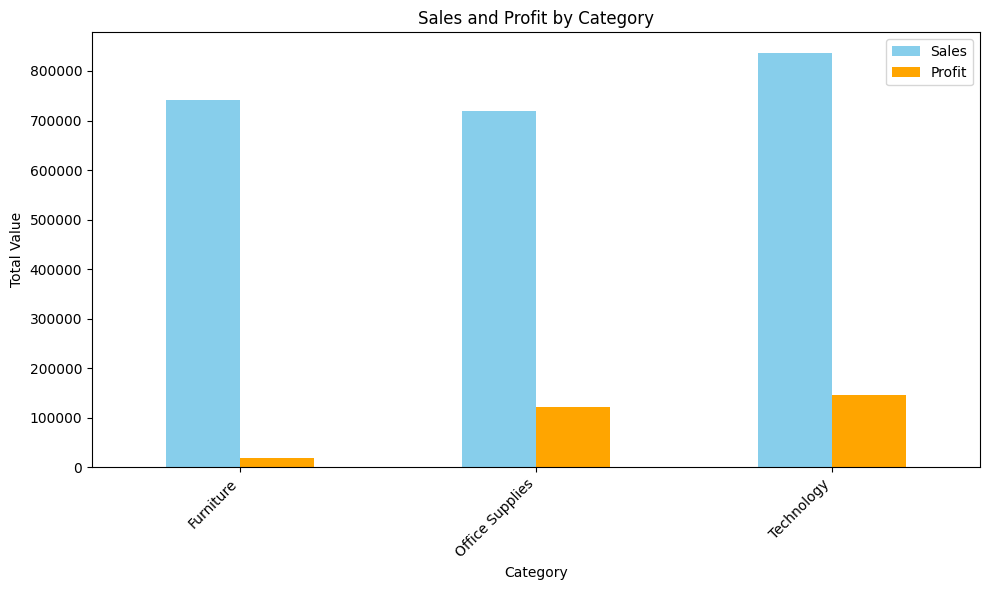

In [100]:
# Visualization
category_performance.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title("Sales and Profit by Category")
plt.xlabel("Category")
plt.ylabel("Total Value")
plt.legend(["Sales", "Profit"])
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

### Top Categories/Subcategories by sales and profit

In [101]:
# Total Sales by Category and Subcategory
category_sales = df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum()
category_sales = category_sales.sort_values(by='Sales', ascending=False)
category_sales = category_sales[0:10]
category_sales

Sales      Profit
Category        Sub-Category                         
Technology      Phones        330007.0540  44515.7306
Furniture       Chairs        328449.1030  26590.1663
Office Supplies Storage       223843.6080  21278.8264
Furniture       Tables        206965.5320 -17725.4811
Office Supplies Binders       203412.7330  30221.7633
Technology      Machines      189238.6310   3384.7569
                Accessories   167380.3180  41936.6357
                Copiers       149528.0300  55617.8249
Furniture       Bookcases     114879.9963  -3472.5560
Office Supplies Appliances    107532.1610  18138.0054

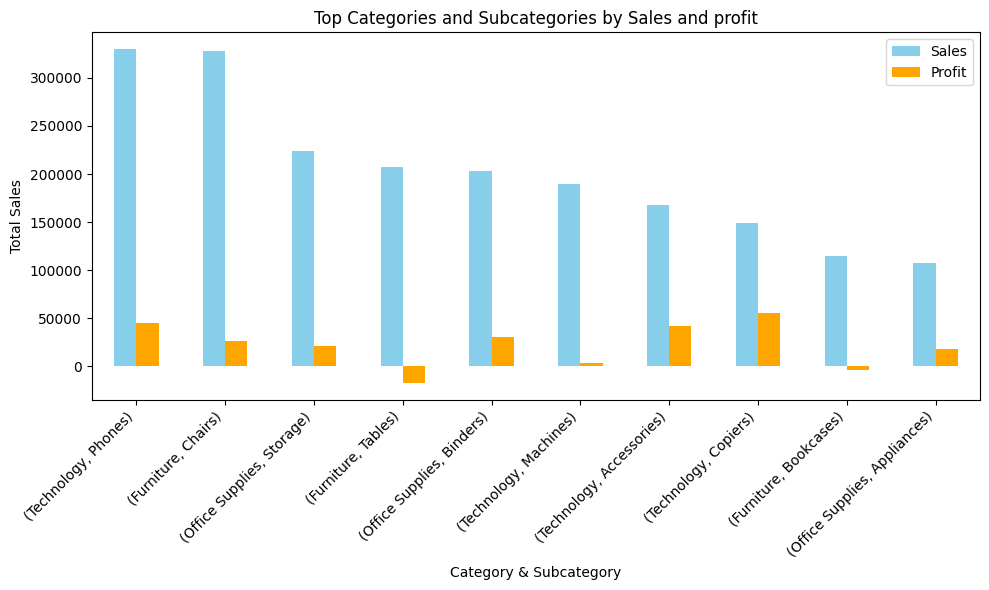

In [102]:
# Visualization
category_sales.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title("Top Categories and Subcategories by Sales and profit")
plt.xlabel("Category & Subcategory")
plt.ylabel("Total Sales")
plt.legend(["Sales", "Profit"])
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Relationship Between Product Price and Profit

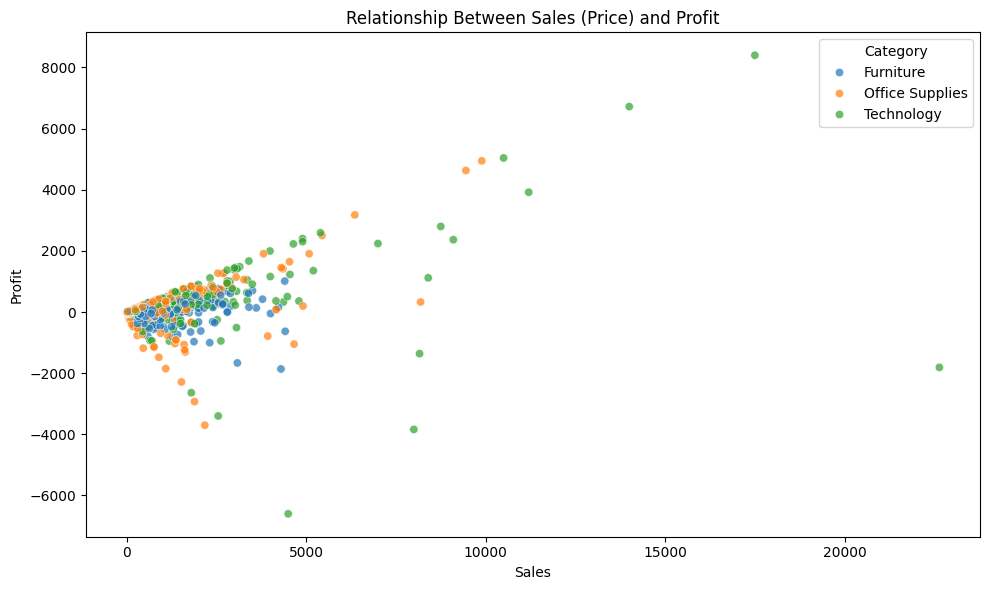

In [103]:
# Scatter plot of sales (proxy for price) vs profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', alpha=0.7)
plt.title("Relationship Between Sales (Price) and Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

- Technology appears to be the most profitable category and could benefit from scaling high-sales products
- Higher sales tend to result in higher profits
- Some transactions have high sales but low or even negative profit (Discounts Effect)


### Impact of Discounts on Sales and Profit

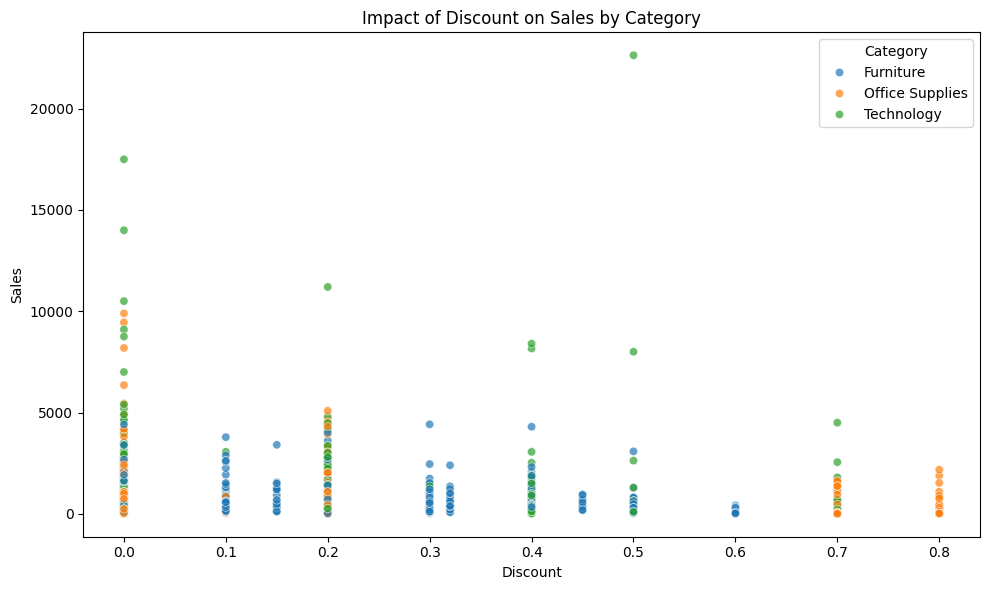

In [104]:
# Scatter plot to visualize impact of Discount on Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Sales', hue='Category', alpha=0.7)
plt.title("Impact of Discount on Sales by Category")
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

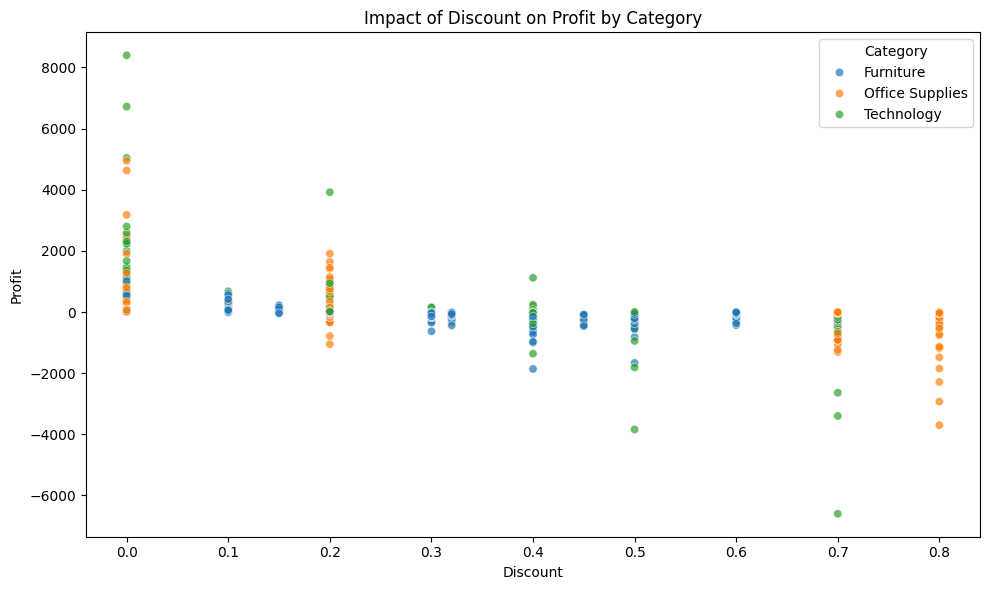

In [105]:
# Scatter plot to visualize impact of Discount on Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.7)
plt.title("Impact of Discount on Profit by Category")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

- Profits turn negative at higher discount levels (above 40%) for all categories
- Discounts between 0%-20% seem to balanced results in both sales and profit for all categories
- Technology: Focus on maintaining lower discounts as it performs well without heavy discounting and achieves the highest profits at 0% discount
- Office Supplies and Furniture: Discounts in the range of 10%-20% may be more effective in driving sales while minimizing profit losses

### Sales, Profit, and Discount Trends by Month

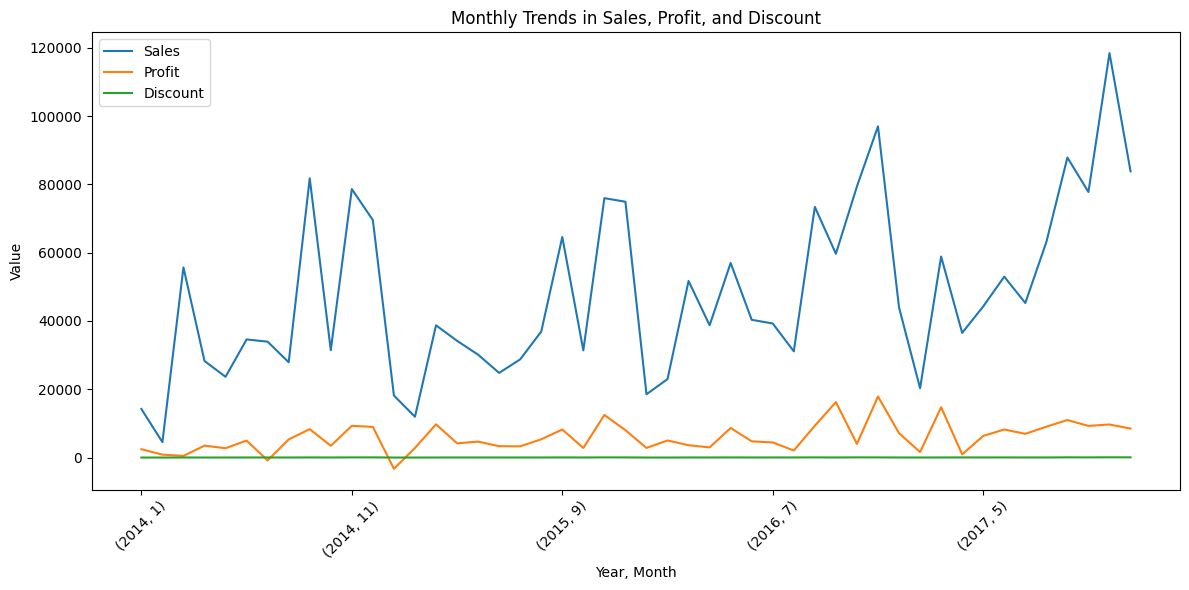

In [106]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year and month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Monthly trends
monthly_trends = df.groupby(['Year', 'Month'])[['Sales', 'Profit', 'Discount']].sum()

# Visualization
monthly_trends.plot(figsize=(12, 6))
plt.title("Monthly Trends in Sales, Profit, and Discount")
plt.xlabel("Year, Month")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend(["Sales", "Profit", "Discount"])
plt.tight_layout()
plt.show()


### Region Analysis


In [107]:
# Split dataset by region
df_central = df[df['Region']=='Central']
df_east = df[df['Region']== 'East']
df_south = df[df['Region'] == 'South']
df_west = df[df['Region'] == 'West']

east_category_sales

Category
Furniture          208291.204
Office Supplies    205516.055
Technology         264973.981
Name: Sales, dtype: float64

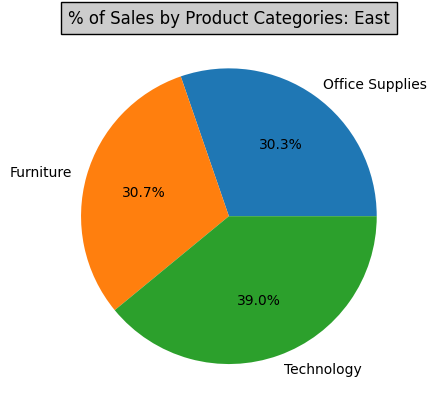

In [108]:
east_category_sales = pd.DataFrame(df_east.groupby('Category')['Sales'].sum())['Sales']

plt_east = pd.DataFrame({'Sales by Category': east_category_sales}, 
                     index = [ 'Office Supplies', 'Furniture','Technology']
                   )

plt.pie(plt_east['Sales by Category'],  labels = plt_east.index, autopct='%1.1f%%')
plt.title("% of Sales by Product Categories: East", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


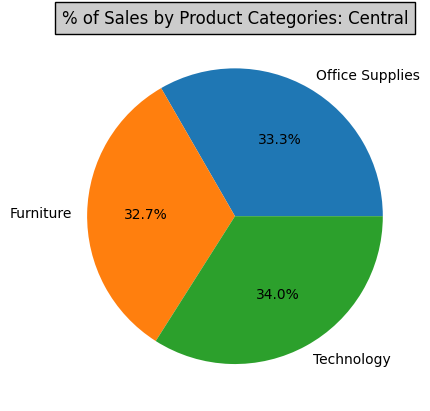

In [109]:
#number of products in each category 
central_category_sales = pd.DataFrame(df_central.groupby('Category')['Sales'].sum())['Sales']

plt_central = pd.DataFrame({'Sales by Category': central_category_sales}, 
                     index = [ 'Office Supplies', 'Furniture','Technology']
                   )

plt.pie(plt_central['Sales by Category'], labels=plt_central.index, autopct='%1.1f%%')
plt.title("% of Sales by Product Categories: Central" , bbox={'facecolor':'0.8', 'pad':5})
plt.show()


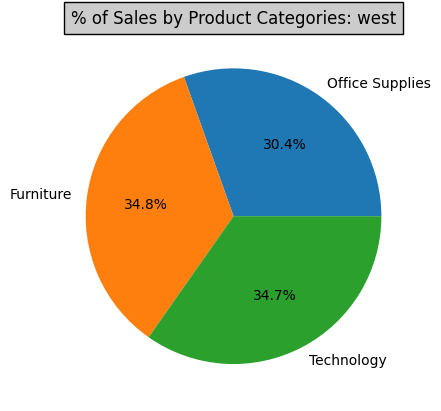

In [110]:
#number of products in each category 
west_category_sales = pd.DataFrame(df_west.groupby('Category')['Sales'].sum())['Sales']

plt_west = pd.DataFrame({'Sales by Category': west_category_sales}, 
                     index = [ 'Office Supplies', 'Furniture','Technology']
                   )

plt.pie(plt_west['Sales by Category'], labels=plt_west.index, autopct='%1.1f%%')
plt.title("% of Sales by Product Categories: west" , bbox={'facecolor':'0.8', 'pad':5})
plt.show()


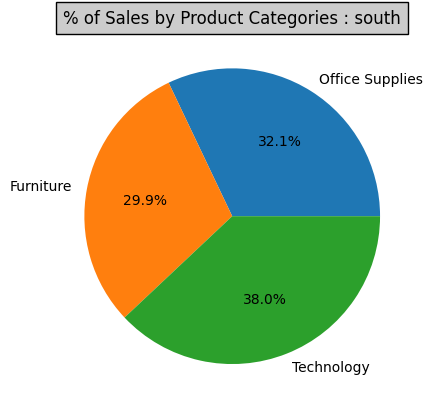

In [111]:
#number of products in each category 
south_category_sales = pd.DataFrame(df_south.groupby('Category')['Sales'].sum())['Sales']

plt_south = pd.DataFrame({'Sales by Category': south_category_sales}, 
                     index = [ 'Office Supplies', 'Furniture','Technology']
                   )

plt.pie(plt_south['Sales by Category'], labels=plt_south.index, autopct='%1.1f%%')
plt.title("% of Sales by Product Categories : south" , bbox={'facecolor':'0.8', 'pad':5})
plt.show()


#### East Region
- 30.3% of products belong to Office Supplies.
- 30.7% of products belong to Furniture.
- 39% of products belong to Technology.
- The proportion of Technology products in the East Region is higher than in the other two categories. 

#### Central Region
- 33.3% of products belong to Office Supplies.
- 32.7% of products belong to Furniture.
- 34% of products belong to Technology.
- The product categories here are evenly distributed. 

#### West Region
- 30.4% of products belong to Office Supplies.
- 34.8% of products belong to Furniture.
- 34.7% of products belong to Technology.

#### South Region
- 32.1% of products belong to Office Supplies.
- 29.9% of products belong to Furniture.
- 38% of products belong to Technology.
- The proportion of Technology products in the South Region is higher than in the other two categories.  

### What is the sales trend over time (moanthly, yearly)?¶


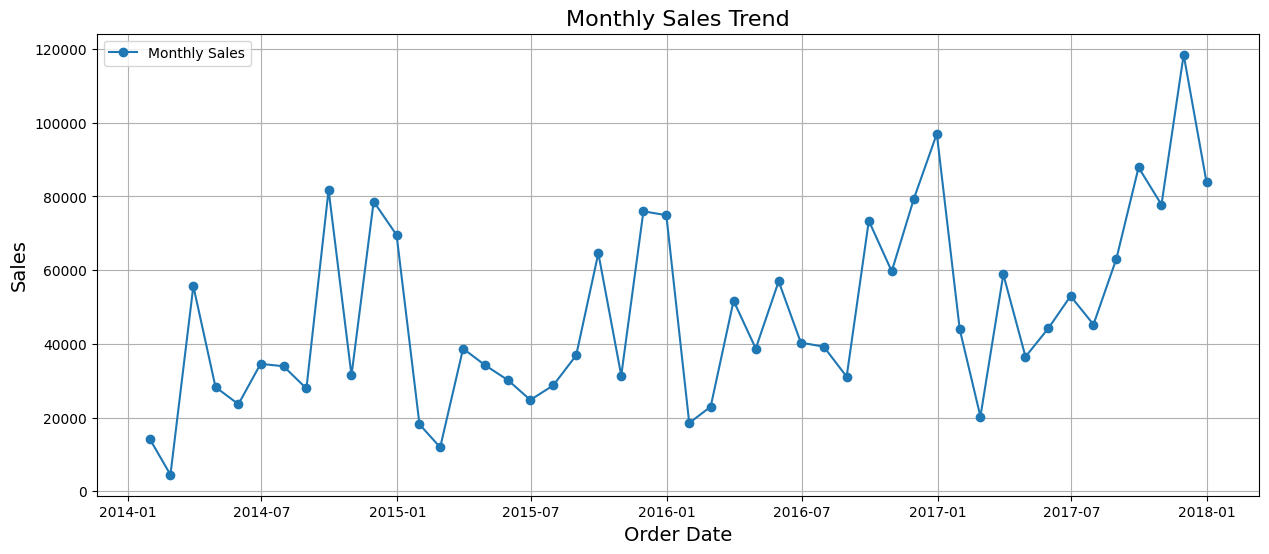

In [112]:
# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by 'Order Date' and sum the numeric columns
monthly_sales = df.groupby(['Order Date'], as_index=False).sum()

# Set the 'Order Date' column as the index of the DataFrame
monthly_sales = monthly_sales.set_index('Order Date')

# Resample the data into monthly intervals
monthly_sales = monthly_sales.resample('M').sum()  # 'M' for month-end frequency

# Plot the monthly sales trend
plt.figure(figsize=(15, 6))
plt.plot(monthly_sales['Sales'], marker='o', linestyle='-', label='Monthly Sales')
plt.xlabel("Order Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("Monthly Sales Trend", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()


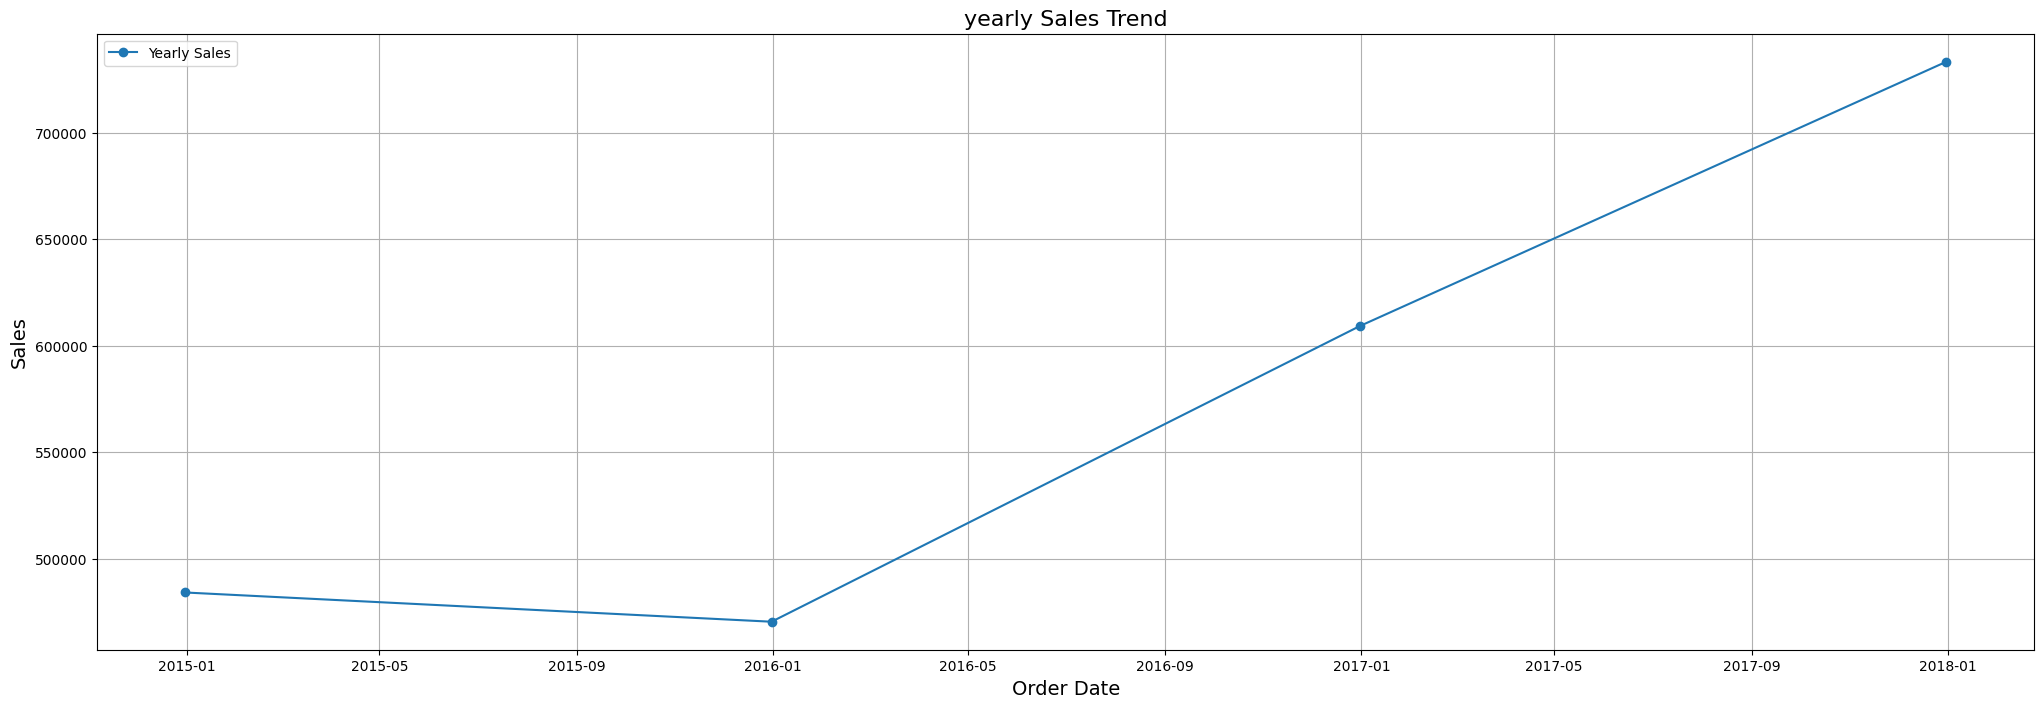

In [113]:
yearly_sales = monthly_sales.resample('Y').sum() 

plt.figure(figsize=(25,8))
plt.plot(yearly_sales['Sales'], marker='o', linestyle='-', label='Yearly Sales')
plt.xlabel("Order Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("yearly Sales Trend", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

### What is the profit trend over time (moanthly, yearly)?¶

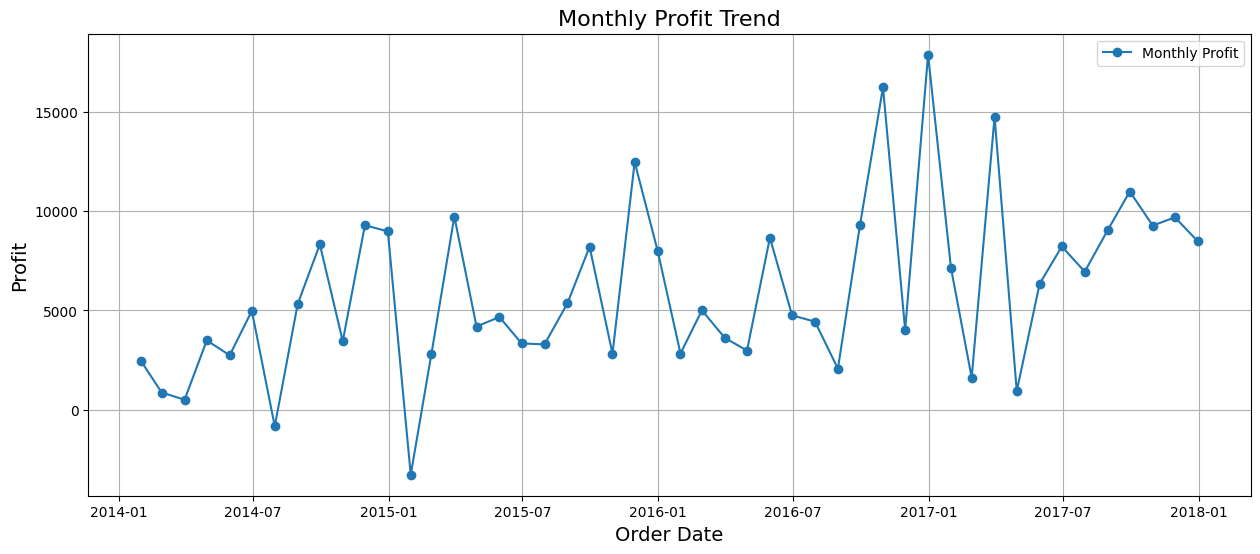

In [114]:
monthly_sales = df.groupby(['Order Date'], as_index=False).sum()

# Set the Order Date column as the index of the dataframe
monthly_sales = monthly_sales.set_index('Order Date')

# Resample the data into monthly intervals
monthly_sales = monthly_sales.resample('M').sum() # M for month

# Plot the monthly profit trend
plt.figure(figsize=(15, 6))
plt.plot(monthly_sales['Profit'], marker='o', linestyle='-', label='Monthly Profit')
plt.xlabel("Order Date", fontsize=14)
plt.ylabel("Profit", fontsize=14)
plt.title("Monthly Profit Trend", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()



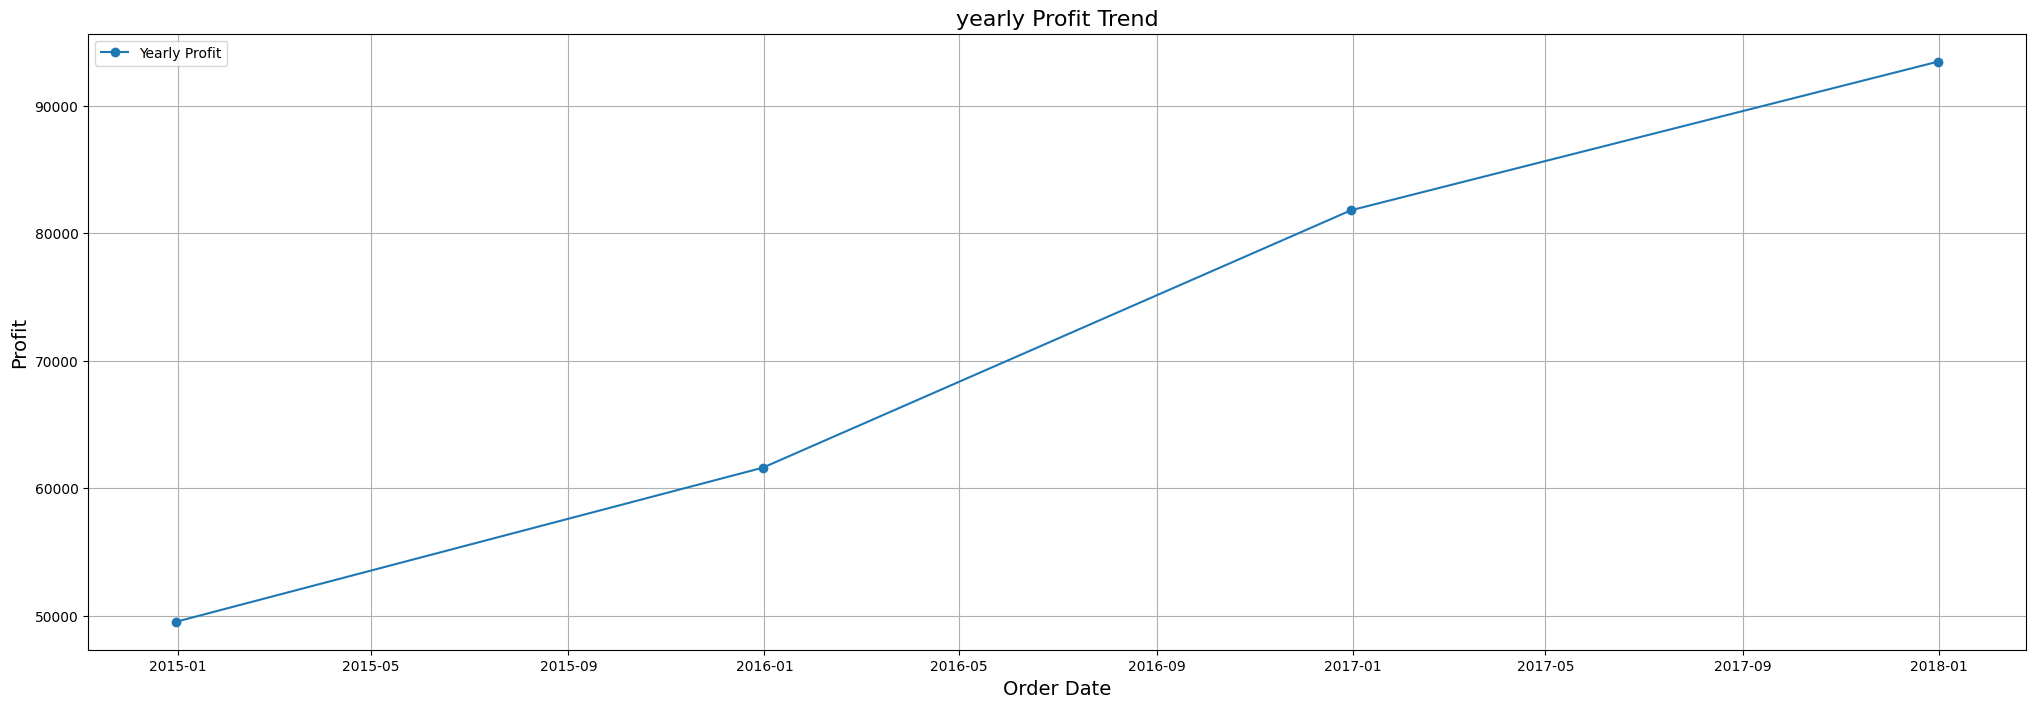

In [115]:
yearly_sales = monthly_sales.resample('Y').sum() 

plt.figure(figsize=(25,8))
plt.plot(yearly_sales['Profit'], marker='o', linestyle='-', label='Yearly Profit')
plt.xlabel("Order Date", fontsize=14)
plt.ylabel("Profit", fontsize=14)
plt.title("yearly Profit Trend", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

- The graph is shown above. It shows an increasing trend of sales within each year and an increasing trend in sales from 2014 to 2017.

According to the graph above, our dataset could use the ARIMA model since it looks like there is a linear relationship between sales and years. However, we need to exclude the trend and seasonal effects to get a stationary dataset.

We could forecast the year for 2018 by each category or sub-category. Below, we take the furniture sales as an example.


- We will use the averages daily sales value to represent that month, and we are using the start of each month as the timestamp.


### Data Preprocessing

- We first analyse the time series of Furniture Sales followed by other categories.

In [131]:
furniture = df.loc[df['Category'] == 'Furniture']

# This shows that we have time-series data of 4 years for furniture sales.
print(furniture['Order Date'].min())
furniture['Order Date'].max()

2014-01-06 00:00:00


Timestamp('2017-12-30 00:00:00')

In [132]:
cols = ['Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
        'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity',
        'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)

In [133]:
# furniture data
furniture.sort_values('Order Date')
furniture.isna().sum()

Order Date    0
Sales         0
Year          0
Month         0
dtype: int64

In [134]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

- Indexing time-series data 

In [135]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [136]:
# Averaging Daily Sales
y = furniture['Sales'].resample('MS').mean()

In [137]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

## Furniture data time-series visualization

<Axes: xlabel='Order Date'>

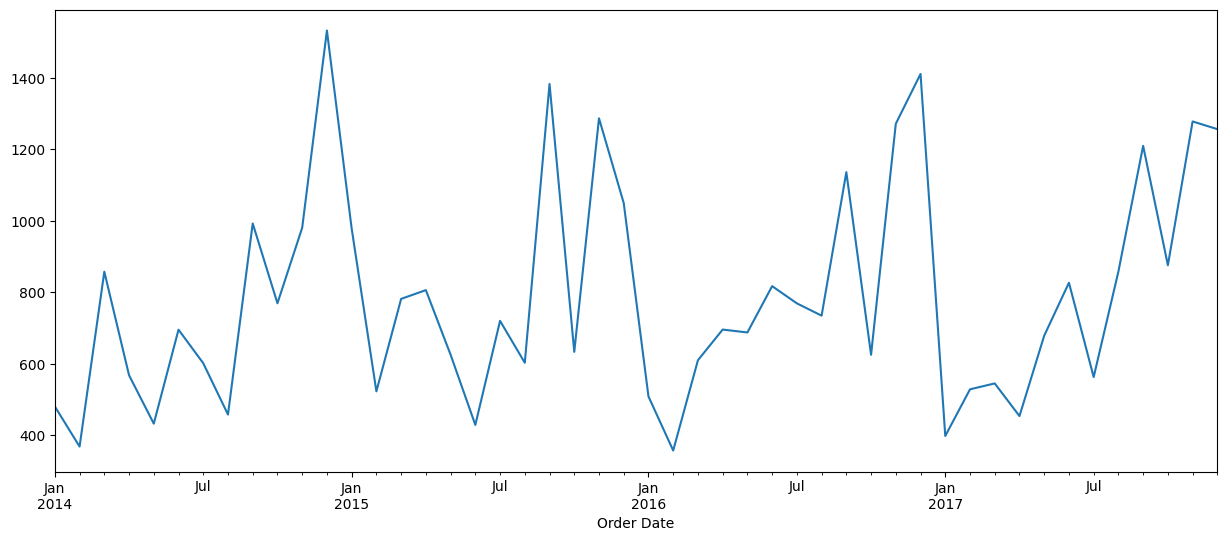

In [138]:
y.plot(figsize=(15, 6))

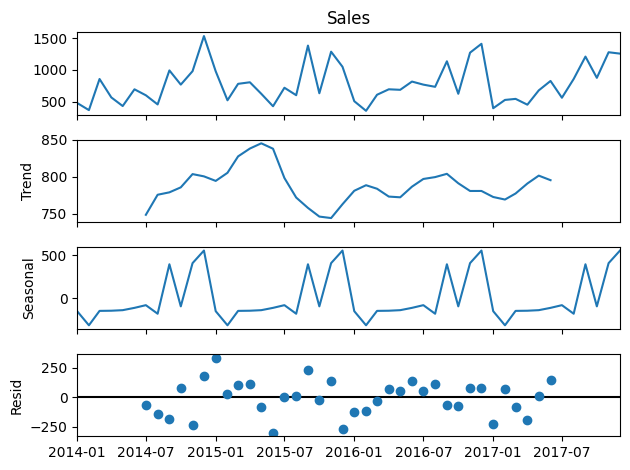

In [139]:
import statsmodels.api as sm   #for seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

#Trend: The long-term direction of the series.
#Seasonal: Repeating patterns (e.g., monthly or yearly cycles).
#Residual: The remainder after removing the trend and seasonal components.

- The above plot shows that the sales of furniture is highly unstable with seasonality and trend easily observable.

## ML Modle 

- Time Series forecasting with ARIMA Model

- ARIMA models are donated with the notation: ARIMA (p, d, q) where:
- p denotes seasonality
- d denotes trend
- q denotes noise in data

- Configuring a SARIMA requires selecting hyperparameters for both the trend and seasonal components of the series.

Non-Seasonality Components:
* p denotes Trend autoregression order
* d denotes Trend difference order
* q denotes Trend moving average order

Seasonality Components:
* p denotes Seasonal autoregressive order.
* d denotes Seasonal difference order.
* q denotes Seasonal moving average order.
* m denotes the number of time steps for a single seasonal period.

In [140]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q)) # create all possible combinations
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq] 
# Here s = 12 12-month (yearly) seasonal cycle.

print('Few parameter combinations are:')
print('{} x {}'.format(pdq[1], seasonal_pdq[1]))
print('{} x {}'.format(pdq[2], seasonal_pdq[2]))

Few parameter combinations are:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


- Now that we've generated all possible parameters for our SARIMA model, we shall find out the best parameter to train the model on it finally. :)

- SARIMA stands for **Seasonal AutoRegressive Integrated Moving Average** model which is an extension of ARIMA model used in modeling the seasonality

- Component as well. So we need not to make time-series stationary (non-seasonal) first before forecasting.

- Stationary time series is one whose statistical properties (mean, variance, autocorrelation) do not change over time

In [141]:
# grid search over the combinations of SARIMA model hyperparameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
# SARIMAX model (an extension of SARIMA that allows for exogenous variables).
# enforce_stationarity=False: Allows the model to use non-stationary data.
# enforce_invertibility=False: Prevents errors due to potential invertibility issues.

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1525.3374802904166
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:477.71701309212006
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:302.2702899793675
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:497.2314433418338
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1432.691994012685
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:304.24882803028567
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:720.92522707581
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2712.4319608848564
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:466.5607429809145
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:291.6261389673301
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:499.58424534967315
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2586.781192804742
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:319.98848769468657
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:291.872557648561
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:677.8947668414504
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1412.6976902107317
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:486.637

- We got the lowest AIC value: 297.788 for ARIMA(1, 1, 1)x(1, 1, 0, 12). We shall use these best params in our model.

- Here, the **Akaike information criterion (AIC)** A measure of model quality that balances goodness-of-fit and model complexity (lower AIC is better). AIC provides a means for model selection.

- USE AIC to compare parameter combinations and identify the one with the lowest AIC
 the less information a model loses (less AIC value), the higher the quality of that model.

## 

## Validating the model forecasts

To validate the model results, we compare the actual sales with the predicted sales of the time series data starting
from 2017/01/01 till the end of the data.

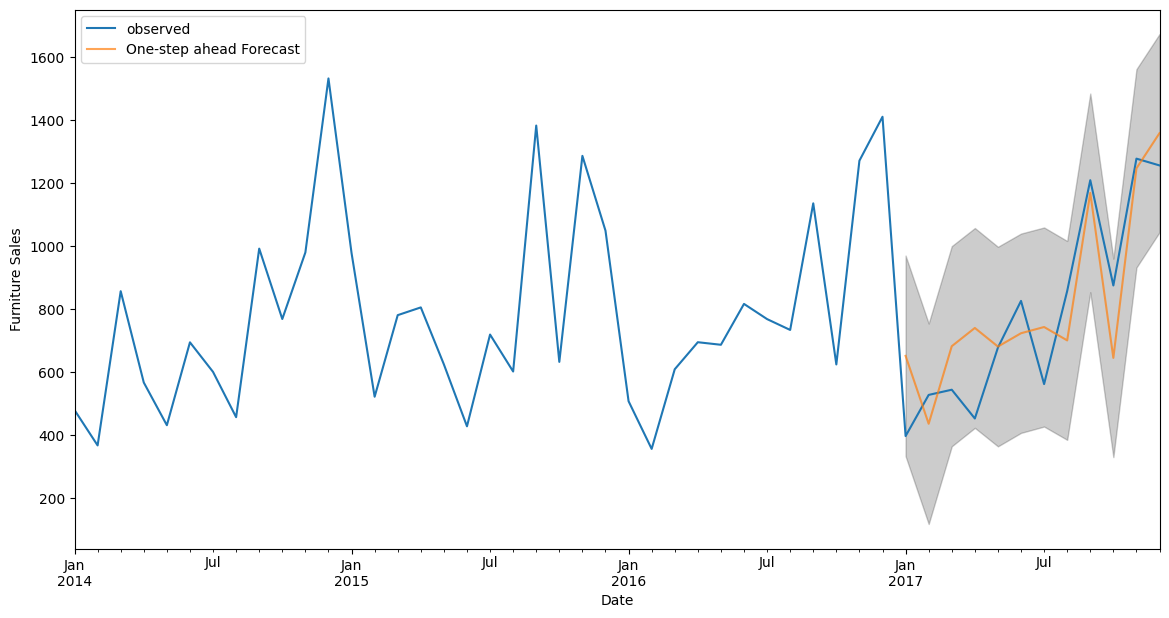

In [142]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The above plot demonstrates that the predicted values alligns well with the true values capturing an upward seasonality. Now, we calculate the Mean Square Error of our predicted values wrt the orignal values.

In [143]:
y_predicted = pred.predicted_mean
y_true = y['2017-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))
print('Root Mean Square Error is:', np.sqrt(mse))

Mean Square Error is: 25708.95
Root Mean Square Error is: 160.3401074208606


## Future Forecasts

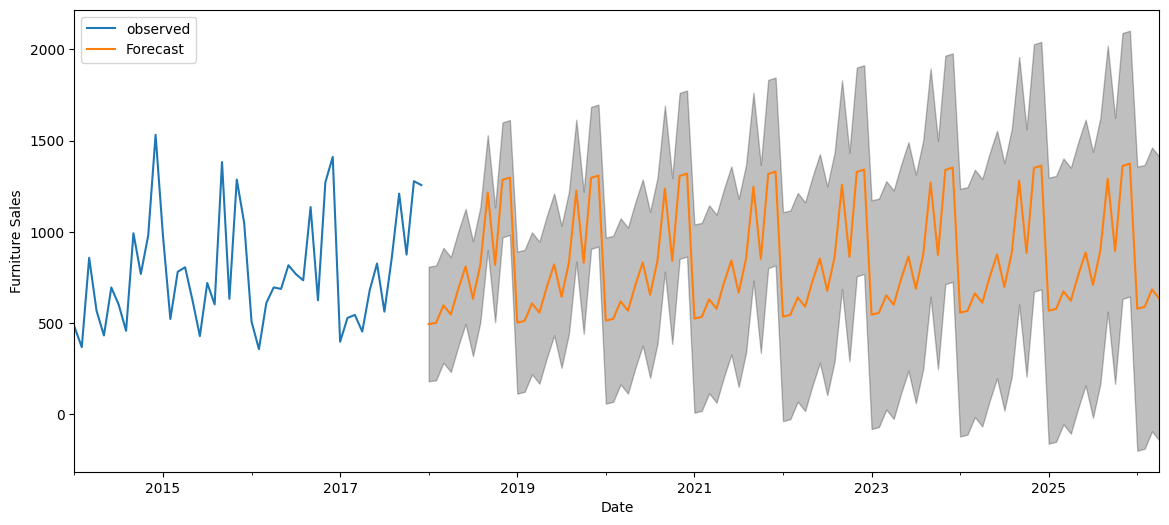

In [144]:
# Forecasting the future (out of sample) values.
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

## Resources:
- Dataset : https://www.kaggle.com/datasets/vivek468/superstore-dataset-final/code
- A Guide to Time Series Forecasting with ARIMA :  https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3
- https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/
- Videos :
- https://www.youtube.com/watch?v=TvhaHPq6xLU
- https://www.youtube.com/watch?v=mipF7mRVpk0
- https://www.youtube.com/watch?v=WUIS7SKD2Ng